Indian Start-up Ecosystem Funding Analysis (2018-2021)

Business Understanding

Summary of the Task:
This project involves analyzing the funding received by start-ups in India from 2018 to 2021. The goal is to investigate the Indian start-up ecosystem and propose strategic recommendations based on data-driven insights. The datasets are provided for each year, and the analysis will cover start-up details, funding amounts, and investors' information. Data is stored across various sources, and it is crucial to gather, clean, and analyze this data to derive meaningful insights


Project Name:
Indian Start-up Funding Project (2018-2021)

Summary of the Task:
This project involves analyzing the funding received by start-ups in India from 2018 to 2021. The goal is to investigate the Indian start-up ecosystem and propose strategic recommendations based on data-driven insights. The datasets are provided for each year, and the analysis will cover start-up details, funding amounts, and investors' information. Data is stored across various sources, and it is crucial to gather, clean, and analyze this data to derive meaningful insights.

Libraries and Packages:
pandas for data manipulation and analysis
numpy for numerical operations
pyodbc for database connectivity
sqlalchemy for database ORM (optional)
matplotlib and seaborn for data visualization
scikit-learn for machine learning (if applicable)
python-dotenv for managing environment variables
requests for handling HTTP requests (if needed)
os and pathlib for handling file paths and directories

## Business Questions

1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

1. Sectors with Highest Growth: This question helps identify the sectors that are experiencing rapid growth in terms of funding received, providing valuable insights into where investor interest and capital are flowing. Understanding these sectors can help investors identify potential high-growth opportunities for investment.

2. Geographical Regions for Startup Activity: Understanding the primary hubs for startup activity and investment within India helps investors gauge where the most vibrant ecosystems are located. Factors contributing to their prominence, such as infrastructure, government support, and access to talent, can influence investment decisions and strategies.

3. Funding Patterns Across Startup Stages: Comparing funding patterns between early-stage startups and more established companies helps investors understand how investment behavior varies depending on the maturity and growth stage of the startup. This insight can inform investment strategies tailored to different stages of the startup lifecycle.

4. Sectorial Funding Disparities: Identifying sectors with the lowest and highest levels of funding sheds light on where capital is concentrated and where there may be untapped opportunities. Understanding the factors contributing to these disparities can help investors assess sector-specific risks and opportunities.

5. Impactful Investors: Analyzing the influence of different investors on startups over the years provides insights into which investors have been most active and successful in driving startup growth. This understanding can help investors identify potential partners or co-investors and assess the reputations and track records of different investment firms.

6. Characteristics of Funded Startups: Identifying key characteristics shared by startups that successfully secure funding helps investors understand what factors contribute to investment readiness and attractiveness. Contrasting these characteristics with those of startups that struggle to attract investment can provide valuable lessons for entrepreneurs and investors alike.

Null Hypothesis(Ho): There is no significant difference in the amount of funding between startups in Bangolore.

Alternative Hypothesis(Ha): There is a significant difference in the amount of funding between startups in Bangalore.

In [16532]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

import folium
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.subplots import go
from matplotlib.ticker import FuncFormatter
from scipy.stats import f_oneway, shapiro, levene

# Database connectivity
import pyodbc

# Database ORM (optional)
from sqlalchemy import create_engine

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Machine learning (if applicable)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Managing environment variables
from dotenv import dotenv_values

# Handling HTTP requests (if needed)
import requests

# Handling file paths and directories
import os
from pathlib import Path
from geopy.geocoders import Nominatim

import warnings 

warnings.filterwarnings('ignore')

Loading Data to Python VSO Environment:

1. Database Connection (2020 and 2021 Data):

In [16533]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [16534]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [16535]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 

connection = pyodbc.connect(connection_string)

In [16536]:
# Now the sql query to get the data is what what you see below. 

#query = "SELECT * FROM LP2_Telco_churn_first_3000"

# select data from 2020

query = "SELECT * FROM dbo.LP1_startup_funding2020"

data20 = pd.read_sql(query, connection)
data20.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [16537]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [16538]:
data20.shape

(1055, 10)

In [16539]:
# creating a column to identify each dataset by addition of data year

data20['Funding_Year'] = 2020

#Change the funding year to integer type

data20['Funding_Year'] = data20['Funding_Year'].astype('int64').astype('int32')

data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Funding_Year   1055 non-null   int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 86.7+ KB


In [16540]:
data20.shape

(1055, 11)

In [16541]:
#printing columns to compare if the column names are matching
print(data20.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10', 'Funding_Year'],
      dtype='object')


In [16542]:
# Renaming some columns

data20.rename(columns = {'Company_Brand' :'Company_Name'}, inplace =True)

data20.rename(columns = {'HeadQuarter': 'Location'}, inplace =True)

data20.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [16543]:
#select specific columns
data20 = data20[['Company_Name', 'Founded','Location','Sector','What_it_does','Founders','Investor','Amount','Stage','Funding_Year']]
                
data20.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [16544]:
# Converting the funded column to numeric data
data20['Founded'] = pd.to_numeric(data20['Founded'], errors='coerce').convert_dtypes(int)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [16545]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2020(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data20["Amount"] = data20["Amount"].apply(clean_amount_2020)

In [16546]:
# Converting the Amount column to a numeric, there the need to remove some symbols including commas and currency

data20['Amount'] = data20['Amount'].apply(lambda x:str(x).replace('$', ''))

data20['Amount'] = data20['Amount'].apply(lambda x:str(x).replace(',', ''))

data20['Amount'] = data20['Amount'].replace('—', np.nan)


In [16547]:
#Find the number of rows with undisclosed amounts 

index1 = data20.index[data20['Amount']=='Undisclosed']

print('The total number of undisclosed records is', len(index1))

The total number of undisclosed records is 0


In [16548]:
# convert undisclosed to NAN
data20['Amount'] = data20['Amount'].replace('Undisclosed', np.nan)

In [16549]:
#print a summary information on the 2020 data 
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   What_it_does  1055 non-null   object
 5   Founders      1043 non-null   object
 6   Investor      1017 non-null   object
 7   Amount        1055 non-null   object
 8   Stage         591 non-null    object
 9   Funding_Year  1055 non-null   int32 
dtypes: Int64(1), int32(1), object(8)
memory usage: 79.5+ KB


In [16550]:
#Find the row with 887000 23000000 in the amount section
index1 = data20.index[data20['Amount']=='887000 23000000']
index1

Index([], dtype='int64')

In [16551]:
#replace the values with the average 
avg = str((887000+23000000)/2)
data20.at[465, 'Amount'] = avg 


In [16552]:
#print the row record to confirm
print(data20.iloc[(465)])

Company_Name                                         True Balance
Founded                                                      2014
Location                                                 Gurugram
Sector                                                    Finance
What_it_does    Earn money by meeting financial needs of your ...
Founders                                     Charlie, Jay, Martin
Investor                                              Balancehero
Amount                                                 11943500.0
Stage                                                    Series C
Funding_Year                                                 2020
Name: 465, dtype: object


In [16553]:
#Find the row with 800000000 to 850000000 in the amount section
index2 = data20.index[data20['Amount']=='800000000 to 850000000']

In [16554]:
#replace the values with the average 
avg = str((800000000+850000000)/2)

data20.at[472, 'Amount'] = avg 

In [16555]:
#print the row record to confirm 
print(data20.iloc[(472)])

Company_Name                                             Eruditus
Founded                                                      2010
Location                                                   Mumbai
Sector                                                  Education
What_it_does    Bring world-class business and professional ed...
Founders                     Chaitanya Kalipatnapu, Ashwin Damera
Investor        Bertelsmann India Investments, Sequoia Capital...
Amount                                                825000000.0
Stage                                                        None
Funding_Year                                                 2020
Name: 472, dtype: object


In [16556]:
#Convert the Amount column to numeric 

#data20['Amount'] = pd.to_numeric(data20['Amount'], errors='coerce')

In [16557]:
#print a summary information on the 2020 data 
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   What_it_does  1055 non-null   object
 5   Founders      1043 non-null   object
 6   Investor      1017 non-null   object
 7   Amount        1055 non-null   object
 8   Stage         591 non-null    object
 9   Funding_Year  1055 non-null   int32 
dtypes: Int64(1), int32(1), object(8)
memory usage: 79.5+ KB


In [16558]:
duplicates = data20[data20.duplicated()]

duplicates

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",nan,None,2020
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,2020


In [16559]:
#drop all duplicates and leave only one record 

data20 = data20.drop_duplicates(keep='first')

In [16560]:
#Check the 2020 datatset information to confirm the datatypes 
data20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company_Name  1052 non-null   object
 1   Founded       839 non-null    Int64 
 2   Location      958 non-null    object
 3   Sector        1039 non-null   object
 4   What_it_does  1052 non-null   object
 5   Founders      1040 non-null   object
 6   Investor      1014 non-null   object
 7   Amount        1052 non-null   object
 8   Stage         590 non-null    object
 9   Funding_Year  1052 non-null   int32 
dtypes: Int64(1), int32(1), object(8)
memory usage: 87.3+ KB


In [16561]:
#Check the first set of row 
data20.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,nan,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [16562]:
# select data from 2021

query = "SELECT * FROM dbo.LP1_startup_funding2021"

data21 = pd.read_sql(query, connection)
data21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [16563]:
data21.shape

(1209, 9)

In [16564]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [16565]:
# creating a column to identify each dataset by addition of data year

data21['Funding_Year'] = 2021

# change the Funding_Year to interger type

data21['Funding_Year'] = data21['Funding_Year'].astype('int64').astype('int32')

data21.info()

data21.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Funding_Year   1209 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 89.9+ KB


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [16566]:
#printing columns to compare if the column names are matching

print(data21.columns)


Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [16567]:
# Renaming some columns

data21.rename(columns = {'Company_Brand' :'Company_Name'}, inplace =True)

data21.rename(columns = {'HeadQuarter': 'Location'}, inplace =True)

data21.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [16568]:
#select specific columns
data21 = data21[['Company_Name', 'Founded','Location','Sector','What_it_does', 'Founders','Investor','Amount','Stage','Funding_Year']]
                
data21.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [16569]:
# total undisclosed in the dataset
index5 = data21.index[data21['Amount']=='Undisclosed']

print(len(index5))

43


In [16570]:
#print the row records 
data21.loc[(index5)].tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Avalon Labs incubates, invests, partners with ...",Varun Mayya,"Tanglin Ventures, Better Capital, Whiteboard C...",Undisclosed,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,Conversational AI platform - Innovate the way ...,"Manish Gupta, Rashi Gupta","Devesh Sachdev, Bhavesh Manglani",Undisclosed,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,Polygon is a blockchain scalability platform.,"Jaynti Kanani, Sandeep Nailwal, Anurag Arjun","Mark Cuban, MiH Ventures",Undisclosed,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Ingenium Education has been pushing e-learning...,"Pramudit Somvanshi, Mohit Patel, Aakash Gupta",Lead Angels,Undisclosed,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,The “ONLINE” Cold Chain network for Reefer tru...,"Swarup Bose, Rajneesh Raman, Arbind Jain",Eaglewings Ventures,Undisclosed,Seed,2021


In [16571]:
# Replace the Undisclosed with NAN

data21['Amount'] = data21['Amount'].replace('Undisclosed', np.nan)

In [16572]:
#print the last 5 row records 
data21.loc[(index5)].tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
824,Avalon Labs,2017.0,Bangalore,FinTech,"Avalon Labs incubates, invests, partners with ...",Varun Mayya,"Tanglin Ventures, Better Capital, Whiteboard C...",NaN,Pre-series A,2021
827,Rezo.ai,2017.0,Noida,AI startup,Conversational AI platform - Innovate the way ...,"Manish Gupta, Rashi Gupta","Devesh Sachdev, Bhavesh Manglani",NaN,Seed,2021
833,Polygon,2017.0,Mumbai,Crypto,Polygon is a blockchain scalability platform.,"Jaynti Kanani, Sandeep Nailwal, Anurag Arjun","Mark Cuban, MiH Ventures",NaN,None,2021
846,Ingenium,2018.0,New Delhi,EdTech,Ingenium Education has been pushing e-learning...,"Pramudit Somvanshi, Mohit Patel, Aakash Gupta",Lead Angels,NaN,Seed,2021
853,Celcius,2020.0,Mumbai,Logistics,The “ONLINE” Cold Chain network for Reefer tru...,"Swarup Bose, Rajneesh Raman, Arbind Jain",Eaglewings Ventures,NaN,Seed,2021


In [16573]:
# number of upspark in Amount column
index6 = data21.index[data21['Amount']=='Upsparks']

print(len(index6)), index6

2


(None, Index([98, 111], dtype='int64'))

In [16574]:
# display them
data21.loc[index6]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [16575]:
#drop the duplicate

data21 = data21.drop(labels=index6[1], axis=0)

In [16576]:
#Rearrange the record data correctly 

data21.loc[index6[0], ['Amount', 'Stage']] = ['$1200000', '']


In [16577]:
# dispaly the changes 
data21.iloc[98]

Company_Name                                              FanPlay
Founded                                                    2020.0
Location                                           Computer Games
Sector                                             Computer Games
What_it_does    A real money game app specializing in trivia g...
Founders                                                   YC W21
Investor                              Pritesh Kumar, Bharat Gupta
Amount                                                   $1200000
Stage                                                            
Funding_Year                                                 2021
Name: 98, dtype: object

In [16578]:
# Find element in amount with series C
index7 = data21.index[data21['Amount']=='Series C']

print(len(index7)), index7

2


(None, Index([242, 256], dtype='int64'))

In [16579]:
# show the entry
data21.loc[index7]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021


In [16580]:
#since its duplicate  drop one 
data21 = data21.drop(labels=index7[1], axis=0)

In [16581]:
#rearrange the columns entery 
data21.loc[index7[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Pharmaceuticals', '', '$22000000', '', 'Series C']

data21.loc[242]

Company_Name                    Fullife Healthcare
Founded                                     2009.0
Location                                          
Sector                             Pharmaceuticals
What_it_does                          Varun Khanna
Founders        Morgan Stanley Private Equity Asia
Investor                                          
Amount                                   $22000000
Stage                                     Series C
Funding_Year                                  2021
Name: 242, dtype: object

In [16582]:
index8 = data21.index[data21['Amount']=='Seed']

print(index8)

Index([257, 1148], dtype='int64')


In [16583]:
data21.loc[index8]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None,2021


In [16584]:
data21.loc[index8[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Electric Mobility', 'Gurugram', '$5000000', '', 'Seed']
data21.loc[index8[1], ['Amount', 'Investor', 'Stage']] = ['1000000', '', 'Seed']

In [16585]:
data21.loc[257]

Company_Name                                           MoEVing
Founded                                                 2021.0
Location                                              Gurugram
Sector                                       Electric Mobility
What_it_does                       Vikash Mishra, Mragank Jain
Founders        Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Investor                                                      
Amount                                                $5000000
Stage                                                     Seed
Funding_Year                                              2021
Name: 257, dtype: object

In [16586]:
index9 = data21.index[data21['Amount']=='ah! Ventures']

print(index9)

Index([538], dtype='int64')


In [16587]:
data21.loc[index9]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021


In [16588]:
data21.loc[index9, ['Amount', 'Stage']] = ['$300000', '']

In [16589]:
data21.loc[538]

Company_Name                                          Little Leap
Founded                                                    2020.0
Location                                                New Delhi
Sector                                                     EdTech
What_it_does                  Soft Skills that make Smart Leaders
Founders        Holistic Development Programs for children in ...
Investor                                             Vishal Gupta
Amount                                                    $300000
Stage                                                            
Funding_Year                                                 2021
Name: 538, dtype: object

In [16590]:
# Pre-series A
index10 = data21.index[data21['Amount']=='Pre-series A']

index10

Index([545], dtype='int64')

In [16591]:
data21.loc[index10]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None,2021


In [16592]:
# ITO angel network, letsventure
index11 = data21.index[data21['Amount']=='ITO Angel Network, LetsVenture']

index11

Index([551], dtype='int64')

In [16593]:
data21.loc[index11]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [16594]:
# rearranging 
data21.at[551, 'Amount'] = '$300000'
data21.at[551, 'Investor'] = 'Omkar Pandharkame, Ketaki Ogale, JITO Angel Network, LetsVenture'
data21.at[551, 'Stage'] = ''

In [16595]:
data21.loc[index11]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale, JITO Angel Ne...",$300000,,2021


In [16596]:
# JITO Angel Network, LetsVenture
index12 = data21.index[data21['Amount']=='JITO Angel Network, LetsVenture']

index12

Index([677], dtype='int64')

In [16597]:
data21.loc[index12]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [16598]:
# rearranging 
data21.at[677, 'Amount'] = '$1000000'
data21.at[677, 'Investor'] = 'Sushil Agarwal, JITO Angel Network, LetsVenture'
data21.at[677, 'Stage'] = ''

In [16599]:
data21.loc[index12]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"Sushil Agarwal, JITO Angel Network, LetsVenture",$1000000,,2021


In [16600]:
index13 = data21.index[data21['Amount']=='nan']

data21['Amount'] = data21['Amount'].replace('nan', np.nan)

In [16601]:
index13 = data21.index[data21['Amount']=='nan']

data21['Amount'] = data21['Amount'].replace('nan', np.nan)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [16602]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2021(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data21["Amount"] = data21["Amount"].apply(clean_amount_2021)

In [16603]:
# replace $ and , to empty space, - to NAN
data21['Amount'] = data21['Amount'].apply(lambda x:str(x).replace('$', ''))

data21['Amount'] = data21['Amount'].apply(lambda x:str(x).replace(',', ''))

data21['Amount'] = data21['Amount'].replace('—', np.nan)

In [16604]:
data21

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021


In [16605]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   What_it_does  1207 non-null   object 
 5   Founders      1203 non-null   object 
 6   Investor      1145 non-null   object 
 7   Amount        1207 non-null   object 
 8   Stage         783 non-null    object 
 9   Funding_Year  1207 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 131.3+ KB


# convert amount column to numeric
data21['Amount']  = pd.to_numeric(data21['Amount'], errors='coerce')

In [16606]:
# Considering Location Column
data21.loc[98]


Company_Name                                              FanPlay
Founded                                                    2020.0
Location                                           Computer Games
Sector                                             Computer Games
What_it_does    A real money game app specializing in trivia g...
Founders                                                   YC W21
Investor                              Pritesh Kumar, Bharat Gupta
Amount                                                  1200000.0
Stage                                                            
Funding_Year                                                 2021
Name: 98, dtype: object

In [16607]:
data21.loc[752]

Company_Name                                        NewLink Group
Founded                                                    2016.0
Location                                                  Beijing
Sector                                               Tech Startup
What_it_does    Developer of an energy management and transpor...
Founders                                      Yang Wang, Zhen Dai
Investor                                             Bain Capital
Amount                                                200000000.0
Stage                                                        None
Funding_Year                                                 2021
Name: 752, dtype: object

In [16608]:
data21['Location'] = data21.Location.str.split(',').str[0]
data21.at[32, 'Location'] = 'Andhra Pradesh'
data21.at[98, 'Location'] = ''
data21.at[241, 'Location'] = ''
data21.at[255, 'Location'] = ''
data21.at[752, 'Location'] = ''
data21.at[1100, 'Location'] = ''
data21.at[1176, 'Location'] = ''

In [16609]:
# Considering Sector Attribute

#data21['Sector'] = data21.Sector.str.split(',').str[0]
#data21.at[1100, 'Sector'] = 'Audio experience'

In [16610]:
data21.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021


In [16611]:
# Get unique values in the Location column
#unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
#unique_Location_list = unique_Location.tolist()

# Print the list of unique Location
#unique_Location_list

In [16612]:
# Replace 'Online Media\t#REF!' with 'Online Media'
#df['Location'].replace('Online Media\t#REF!', 'Online Media', inplace=True)

# Replace 'Manchester, Greater Manchester' with 'Manchester'
#df['Location'].replace('Manchester, Greater Manchester', 'Manchester', inplace=True)


In [16613]:
# Filter the data where the "Location" column is equal to "The Nilgiris"
#df[df['Location'] == "The Nilgiris"]

Loading Data to Python VSO Environment:

2. Database Connection (2019 Data):

In [16614]:
# Accessing the data for 2019 can be found in OneDrive. The file name startup_funding2019.csv

data19 = pd.read_csv('startup_funding2019.csv')
data19.head()



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [16615]:
data19.shape


(89, 9)

In [16616]:
data19.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [16617]:
# Creating a column to identify each dataset by addition of data year
data19['Funding_Year'] = 2019

#Change the funding year to integer type

data19['Funding_Year'] = data19['Funding_Year'].astype('int64').astype('int32')


data19.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [16618]:

# rename the columns for consistency 

data19.rename(columns = {'Company/Brand':'Company_Name'}, inplace = True)

data19.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

data19.rename(columns = {'Amount($)':'Amount'}, inplace = True)

data19.rename(columns = {'What it does':'What_it_does'}, inplace = True)

data19.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [16619]:
#select specific columns
data19 = data19[['Company_Name', 'Founded','Location','Sector','What_it_does','Founders','Investor','Amount','Stage','Funding_Year']]
data19.head()               


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [16620]:
#check the summarized information on the 2019 dataset 
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   What_it_does  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        89 non-null     object 
 8   Stage         43 non-null     object 
 9   Funding_Year  89 non-null     int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 6.7+ KB


##### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [16621]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2019(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0142, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data19["Amount"] = data19["Amount"].apply(clean_amount_2019)

In [16622]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace('₹', ''))

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace('$', ''))

data19['Amount'] = data19['Amount'].apply(lambda x:str(x).replace(',', ''))

data19['Amount'] = data19['Amount'].replace('—', np.nan)

In [16623]:
#Some rows-values in the amount column are undisclosed 
# Extract the rows with undisclosed funding information 

index_new = data19.index[data19['Amount']=='Undisclosed']
#Print the number of rows with such undisclosed values
print('The number of values with undisclosed amount is ', len(index_new))

The number of values with undisclosed amount is  0


In [16624]:
#check out these records 
data19.loc[(index_new)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [16625]:
#Since undisclosed amounts does not provide any intelligenc, 
#we decided to drop rows with such characteristics 
# Replace the undisclosed amounts with an empty string

data19['Amount'] = data19['Amount'].replace('Undisclosed', np.nan)

In [16626]:
#check out these records 
data19.loc[(index_new)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [16627]:
#Convert the Amount column to float 

#data19['Amount'] = pd.to_numeric(data19['Amount'], errors='coerce')


In [16628]:
#Check the first 5 rows of the dataset 
data19.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [16629]:
#Check the summary information of the dataset 
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   What_it_does  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        89 non-null     object 
 8   Stage         43 non-null     object 
 9   Funding_Year  89 non-null     int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 6.7+ KB


In [16630]:
#Check if there are any NULL VALUES 
data19.isna().any().sum()

5

In [16631]:
#find duplicates 

duplicate = data19[data19.duplicated()]

duplicate


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year


In [16632]:
data19['Amount'].unique()

array(['6300000.0', '150000000.0', '28000000.0', '30000000.0',
       '6000000.0', 'nan', '1000000.0', '20000000.0', '275000000.0',
       '22000000.0', '5000000.0', '140500.0', '540000000.0', '15000000.0',
       '182700.0', '12000000.0', '11000000.0', '15500000.0', '1500000.0',
       '5500000.0', '2500000.0', '140000.0', '230000000.0', '49400000.0',
       '32000000.0', '26000000.0', '150000.0', '400000.0', '2000000.0',
       '100000000.0', '8000000.0', '100000.0', '50000000.0',
       '120000000.0', '4000000.0', '6800000.0', '36000000.0', '5700000.0',
       '25000000.0', '600000.0', '70000000.0', '60000000.0', '220000.0',
       '2800000.0', '2100000.0', '7000000.0', '311000000.0', '4800000.0',
       '693000000.0', '33000000.0'], dtype=object)

Loading Data to Python VSO Environment:

2. Database Connection (2018 Data):

In [16633]:
# The third data (data for 2018) is hosted on this GitHub Repository, in file called startup_funding2018.csv

data18 = pd.read_csv('startup_funding2018.csv')
data18.head()



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [16634]:
data18.shape

(526, 6)

In [16635]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [16636]:
# rename the columns for consistency 

#industry --> sector 
#Round/Series --> stage 

data18.rename(columns = {'Company Name':'Company_Name'}, inplace = True)

data18.rename(columns = {'headquarter':'Location'}, inplace = True)

data18.rename(columns = {'Industry':'Sector'}, inplace = True)

data18.rename(columns = {'Round/Series':'Stage'}, inplace = True)

data18.rename(columns = {'About Company': 'What_it_does'}, inplace = True)

# Add founded, investor, What_it_does, Founders, funding year as a column 
data18['Founded'] = np.nan
data18['Investor'] = np.nan
data18['Founders'] = np.nan
data18

,Company_Name,Sector,Stage,Amount,Location,What_it_does,Founded,Investor,Founders
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",NaN,NaN,NaN
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,NaN,NaN,NaN
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,NaN,NaN,NaN
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,NaN


In [16637]:
# Creating a column to identify each dataset by addition of data year

data18['Funding_Year'] = 2018

#Change the funding year to integer type 

data18['Funding_Year'] = data18['Funding_Year'].astype('int64').astype('int32')

data18.head()

,Company_Name,Sector,Stage,Amount,Location,What_it_does,Founded,Investor,Founders,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,2018


In [16638]:
#select specific columns
data18 = data18[['Company_Name', 'Founded','Location','Sector', 'What_it_does', 'Founders','Investor','Amount','Stage','Funding_Year']]
                
data18.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018
1,Happy Cow Dairy,NaN,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,"₹40,000,000",Seed,2018
2,MyLoanCare,NaN,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,"₹65,000,000",Series A,2018
3,PayMe India,NaN,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000,Angel,2018
4,Eunimart,NaN,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,—,Seed,2018


In [16639]:
#check the shape of the dataset 
data18.shape 

(526, 10)

In [16640]:
#check if there are any Null Values
data18.isna().any()

Company_Name    False
Founded          True
Location        False
Sector          False
What_it_does    False
Founders         True
Investor         True
Amount          False
Stage           False
Funding_Year    False
dtype: bool

In [16641]:
#Strip the location column to only the city-area. 
data18['Location'] = data18.Location.str.split(',').str[0]
data18['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [16642]:
#Strip the sector column to the first sector element.
#data18['Sector'] = data18.Sector.str.split(',').str[0]
#data18['Sector'].head()

In [16643]:
data18

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000,Seed,2018
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,"₹40,000,000",Seed,2018
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,"₹65,000,000",Series A,2018
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000,Angel,2018
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,—,Seed,2018
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,NaN,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C,2018
522,Happyeasygo Group,NaN,Haryana,"Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,—,Series A,2018
523,Mombay,NaN,Mumbai,"Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed,2018
524,Droni Tech,NaN,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,"₹35,000,000",Seed,2018


##### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [16644]:
# Create a function to clean the Amount column of the 2018 DataFrame and convert Indian Rupees to US Dollars

def clean_amount_2018(Amount):
    try:
        Amount = str(Amount)
        # Remove commas
        Amount = Amount.replace(",", "")
        Amount = Amount.replace('—', "")
        # Check if the value is in Indian Rupees and convert US Dollars: Using USD = 68.4113 which was the average annual Indian Rupee to US Dollars in 2018
        if "₹" in Amount:
            Amount = Amount.replace("₹", "")
            return round(float(Amount) * 0.0146, 2)
        # Check if the value is in US Dollars
        elif "$" in Amount:
            Amount = Amount.replace("$", "")
            return round (float(Amount), 2)
        # check if no currency symbol is present, assume US Dollars
        else:
            return round(float(Amount), 2)
    except ValueError:
        # If the value is not a number, return NaN
        return np.nan
        
# Clean the Amount column of the 2018 DataFrame
data18["Amount"] = data18["Amount"].apply(clean_amount_2018)

In [16645]:
#get index of rows where 'Amount' column is in rupeess
#get_index = data18.index[data18['Amount'].str.contains('₹')]

In [16646]:
#Check the summary information about the 2018 dataset 
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  526 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      526 non-null    object 
 3   Sector        526 non-null    object 
 4   What_it_does  526 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        378 non-null    float64
 8   Stage         526 non-null    object 
 9   Funding_Year  526 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 39.2+ KB


In [16647]:
data18.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018


In [16648]:
data18['Amount'].unique()

array([2.500000e+05, 5.840000e+05, 9.490000e+05, 2.000000e+06,
                nan, 1.600000e+06, 2.336000e+05, 7.300000e+05,
       1.460000e+06, 1.500000e+05, 1.100000e+06, 7.300000e+03,
       6.000000e+06, 6.500000e+05, 5.110000e+05, 9.344000e+05,
       2.920000e+05, 1.000000e+06, 5.000000e+06, 4.000000e+06,
       4.380000e+05, 2.800000e+06, 1.700000e+06, 1.300000e+06,
       7.300000e+04, 1.825000e+05, 2.190000e+05, 5.000000e+05,
       1.518400e+06, 6.570000e+05, 1.340000e+07, 3.650000e+05,
       3.854400e+05, 1.168000e+05, 8.760000e+02, 9.000000e+06,
       1.000000e+05, 2.000000e+04, 1.200000e+05, 4.964000e+05,
       4.993200e+06, 1.431450e+05, 8.760000e+06, 7.420000e+08,
       1.460000e+07, 2.920000e+07, 3.980000e+06, 1.000000e+04,
       1.460000e+03, 3.650000e+06, 1.000000e+09, 7.000000e+06,
       3.500000e+07, 8.030000e+06, 2.850000e+07, 3.504000e+06,
       1.752000e+06, 2.400000e+06, 3.000000e+07, 3.650000e+07,
       2.300000e+07, 1.100000e+07, 6.424000e+05, 3.2400

In [16649]:
data18.loc[(178)]

Company_Name                                       BuyForexOnline
Founded                                                       NaN
Location                                                Bangalore
Sector                                                     Travel
What_it_does    BuyForexOnline.com is India's first completely...
Founders                                                      NaN
Investor                                                      NaN
Amount                                                  2000000.0
Stage           https://docs.google.com/spreadsheets/d/1x9ziNe...
Funding_Year                                                 2018
Name: 178, dtype: object

In [16650]:
data18.loc[178, ['Stage']] = ['']

data18['Stage'] = data18['Stage'].apply(lambda x:str(x).replace('Undisclosed', ''))

In [16651]:
#drop duplicates 

data18 = data18.drop_duplicates(keep='first')


In [16652]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  525 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      525 non-null    object 
 3   Sector        525 non-null    object 
 4   What_it_does  525 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        377 non-null    float64
 8   Stage         525 non-null    object 
 9   Funding_Year  525 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 43.1+ KB


In [16653]:
# Rename round_series to stage and location to headquarter
data18.rename(columns={
    'Company Name': 'company_brand', 
    'Industry': 'sector', 
    'Round/Series': 'stage', 
    'About Company': 'what_it_does', 
    
    },
    inplace=True
)

data18.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  525 non-null    object 
 1   Founded       0 non-null      float64
 2   Location      525 non-null    object 
 3   Sector        525 non-null    object 
 4   What_it_does  525 non-null    object 
 5   Founders      0 non-null      float64
 6   Investor      0 non-null      float64
 7   Amount        377 non-null    float64
 8   Stage         525 non-null    object 
 9   Funding_Year  525 non-null    int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 43.1+ KB


In [16654]:
# git clone https://github.com/SamuelAsong/indian-startup-funding-analysis.git
# cd indian-startup-funding-analysis
# pip install -r requirements.txt


CRISP-DM Process:
Business Understanding:

Define project objectives and requirements
Understand the start-up ecosystem and the importance of funding data
Data Understanding:

Gather and explore datasets for 2018, 2019, 2020, and 2021
Identify key features and initial insights
Data Preparation:

Clean and preprocess data
Handle missing values, duplicates, and inconsistent data
Merge datasets into a single comprehensive dataset
Data Analysis:

Perform exploratory data analysis (EDA)
Identify trends, patterns, and outliers
Visualize funding trends over the years
Modeling (if applicable):

Develop machine learning models to predict funding success (optional)
Evaluate model performance
Evaluation:

Assess the analysis results and model performance
Validate findings against business objectives
Deployment:

Present findings and recommendations
Prepare a final report and presentation
Conclusion and Findings:
Summarize key insights from the data analysis
Highlight significant trends and patterns in the Indian start-up funding landscape
Provide actionable recommendations based on data-driven insights
Discuss potential limitations and future work
This structured approach ensures a comprehensive analysis and effective communication of results, helping to make strategic, data-driven decisions in the Indian start-up ecosystem.








The CRISP-DM reference model 
1 Business understanding 

1.1 Determine business objectives 

1.2 Assess situation 

1.3 Determine data mining goals 

1.4 Produce project plan 

2 Data understanding 

2.1 Collect initial data 

2.2 Describe data 

2.3 Explore data 

2.4 Verify data quality 

3 Data preparation 

3.1 Select data 

3.2 Clean data 

3.3 Construct data 

3.4 Integrate data 

3.5 Format data 

4 Modeling 

4.1 Select modeling technique 

4.2 Generate test design 

4.3 Build model 

4.4 Assess model 

5 Evaluation 

5.1 Evaluate results 

5.2 Review process 

5.3 Determine next steps 

6 Deployment 

6.1 Plan deployment 

6.2 Plan monitoring and maintenance report 

6.4 Review project 

#### Exploratory Data Analysis: EDA

This is the segment dedicated to thoroughly examining the datasets, presenting them, formulating hypotheses, and strategizing the cleaning, processing, and creation of features.

In [16655]:
print (data21.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [16656]:
print (data20.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [16657]:
print (data19.columns)


Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [16658]:
print (data18.columns)

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Funding_Year'],
      dtype='object')


In [16659]:
# concatenating all the dataframes together
df = pd.concat([data18, data19, data20, data21], axis=0)

In [16660]:
# Export DataFrame to CSV file
#df.to_csv('df.csv', index=False)


In [16661]:
#select specific columns

                
df.head() 

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
0,TheCollegeFever,<NA>,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018
1,Happy Cow Dairy,<NA>,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018
2,MyLoanCare,<NA>,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018
3,PayMe India,<NA>,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018
4,Eunimart,<NA>,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018


In [16662]:
df.tail()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",8000000.0,Series A,2021


In [16663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   Float64
 2   Location      2759 non-null   object 
 3   Sector        2855 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2248 non-null   object 
 7   Amount        2725 non-null   object 
 8   Stage         1941 non-null   object 
 9   Funding_Year  2873 non-null   int32  
dtypes: Float64(1), int32(1), object(8)
memory usage: 238.5+ KB


In [16664]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2105.0,2016.085986,4.367256,1963.0,2015.0,2017.0,2019.0,2021.0
Funding_Year,2873.0,2020.023669,1.087148,2018.0,2020.0,2020.0,2021.0,2021.0


In [16665]:
# Remove the undisclosed records from Data_df
df = df[df['Amount']!='Undisclosed']
df['Amount'].unique()

array([250000.0, 584000.0, 949000.0, 2000000.0, nan, 1600000.0, 233600.0,
       730000.0, 1460000.0, 150000.0, 1100000.0, 7300.0, 6000000.0,
       650000.0, 511000.0, 934400.0, 292000.0, 1000000.0, 5000000.0,
       4000000.0, 438000.0, 2800000.0, 1700000.0, 1300000.0, 73000.0,
       182500.0, 219000.0, 500000.0, 1518400.0, 657000.0, 13400000.0,
       365000.0, 385440.0, 116800.0, 876.0, 9000000.0, 100000.0, 20000.0,
       120000.0, 496400.0, 4993200.0, 143145.0, 8760000.0, 742000000.0,
       14600000.0, 29200000.0, 3980000.0, 10000.0, 1460.0, 3650000.0,
       1000000000.0, 7000000.0, 35000000.0, 8030000.0, 28500000.0,
       3504000.0, 1752000.0, 2400000.0, 30000000.0, 36500000.0,
       23000000.0, 11000000.0, 642400.0, 3240000.0, 876000.0, 540000000.0,
       9490000.0, 23360000.0, 900000.0, 10000000.0, 1500000.0, 1022000.0,
       14000000.0, 1496500.0, 100000000.0, 17520.0, 75920000.0, 800000.0,
       1041000.0, 15000.0, 1400000.0, 1200000.0, 2200000.0, 1800000.0,
       3

In [16666]:
# index with undisclosed value at Investor column
index_ = df.index[df['Investor']=='Undisclosed']
index_

Index([5, 59, 70, 633, 675, 741, 798, 824, 902, 964, 1003, 1006, 1007], dtype='int64')

In [16667]:
# replacing them with NAN
df['Investor'] = df['Investor'].replace('Undisclosed', np.nan)

##### Cleaning the Sector Column

##### Cleaning the Sector Column

#### Standardize the sector names by converting them to title case

In [16668]:
unique_sectors = df['Sector'].unique()
print(unique_sectors)




['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

In [16669]:
print(df['Sector'].to_string(index=False))


Brand Marketing, Event Promotion, Marketing, Sp...
                              Agriculture, Farming
  Credit, Financial Services, Lending, Marketplace
                       Financial Services, FinTech
                E-Commerce Platforms, Retail, SaaS
                  Cloud Infrastructure, PaaS, SaaS
                    Internet, Leisure, Marketplace
                                   Market Research
      Information Services, Information Technology
                                   Mobile Payments
                                        B2B, Shoes
                                          Internet
Apps, Collaboration, Developer Platform, Enterp...
                                     Food Delivery
                             Industrial Automation
       Automotive, Search Engine, Service Industry
                         Finance, Internet, Travel
Accounting, Business Information Systems, Busin...
Artificial Intelligence, Product Search, SaaS, ...
              Internet of Thing

In [16670]:
# Get unique values in the Company_Brand column
unique_sectors = df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

In [16671]:
# Filter the data where the "Sector" column is equal to "Manchester, Greater Manchester"
df[df['Sector'] == "Manchester, Greater Manchester"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1176,Peak,2014.0,,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C,2021


In [16672]:
# Swap values between 'Sector' and 'Location' columns for the row where 'Company_Name' is 'Peak'
df.loc[df['Company_Name'] == 'Peak', ['Sector', 'Location']] = df.loc[df['Company_Name'] == 'Peak', ['Location', 'Sector']].values

# Filter the data where the "Company_Anme" column is equal to Peak
df[df['Company_Name'] == "Peak"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year
1176,Peak,2014.0,"Manchester, Greater Manchester",,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C,2021


In [16673]:
# Get unique values in the Company_Brand column
unique_sectors = df['Sector'].unique()

# Convert the unique values array to a list
unique_sectors_list = unique_sectors.tolist()

# Print the list of unique company brands
unique_sectors_list

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Market Research',
 'Information Services, Information Technology',
 'Mobile Payments',
 'B2B, Shoes',
 'Internet',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Food Delivery',
 'Industrial Automation',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Financial Services',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software

##### Mapping Sector

In [16674]:
import re

# Define the sector redistribution function
def sector_redistribution(Sector):
    if re.search(r'Credit Cards|Taxation|Banking|Insuretech|Infratech|Saas\xa0\xa0Startup|Equity Management|Wealth Management|Saas  Startup|Insurtech|  Venture Capitalist| Crowdsourcing|Cryptocurrency|Online Financial Service|Neo-Banking|Capital Markets|Mutual Funds|Bank|Finance|Crypto|Account|Credit|Venture|Crowd|Blockchain|Fund|Lending|Trading|Wealth|Insurance|Remittance|Money|Equity|Investment|Mortgage|Financial Services|  Fintech |  fintech|  finTech| Mutual Funds|  FinTech |Nft|Payments |Venture Capital', Sector):
        return 'Financial Services'
    elif re.search(r'Agritech|Agriculture|Soil-Tech|Fishery|Agri|Biotechnology|Industrial|Farming|Fish|Milk|Diary|Dairy Startup | Agriculture|Farming|AgTech|Supply Chain Management|Farmers Market', Sector):
        return 'Agriculture'
    elif re.search(r'Machine Learning|Hrtech|Ar/Vr|Technology|Ai|E-Connect|E-Market|Traveltech|Biotech|Medtech|Ad-Tech|Healthtech|Games|Computer & Network Security|Saas Startup|Scanning App|Cloud Company|Cybersecurity|Aero Company|Cloud Computing|Techonology|E-Learning|Content Management|Recruitment|Consultancy|Ecommerce|Ev|Designing|Networking|Product Studio|Legaltech| Proptech|Techonology|Milk Startup|Craft Beer|Online Credit Management Startup|Foodtech|Spacetech|Deisgning|Clothing|Logitech|Femtech|D2C|Skill Development|Martech|Luxury Car Startup|Emobility|It|Healthcare|Qsr Startup|Sportstech|E-Marketplace|Cleantech|Heathtech|Digital Mortgage|Innovation Management|Photonics Startup| Photonics Startup|Life Sciences|Cloud Kitchen|Content Marktplace|Vehicle Repair Startup|Photonics Startup| Deeptech|Martech|  Nano Distribution Network', Sector):
        return 'Software & Technology'
    elif re.search(r'Food & Beverage|Beverages|Foodtech|Craft Beer|Milk Startup|Beverage|Catering|Cook|Food|Restaurants', Sector):
        return 'Food & Beverage'
    elif re.search(r'Auto-Tech|Tyre Management|Automobiles|Automobile|E-Mobility|Autonomous Vehicles|Vehicle Repair Startup|Automotive|Air Transport|Transport|Logistics|Vehicle|Transportation|Aviation|Vehicles|Tyre|Fleet|Wheels|Aero|Mobility|Aeorspace|Wl & Rac Protection|Micro-Mobiity|Delivery Service', Sector):
        return 'Transport'
    elif re.search(r'Business Intelligence|Data Science|Analytics|Consulting|Human|Career|Erp|Advertising|Advertisement|Market Research|Entrepre|Recruit|Hr|Working|Sultancy|Advisory|Work|Job|Management|Skill|Legal|Crm|Specific Domain To Individuals| Data Intelligence    |Business  | Information ServicesMarketing |Staffing & Recruiting|Human Resources    |Multinational Conglomerate Company', Sector):
        return 'Business Services'
    elif re.search(r'Renewables & Environment|Renewable Player|Electric Vehicle|Pollution Control Equiptment|Cleantech|Clean Energy|Energy|Boil &|Boil|Sanitation Solutions|Solar|Electricity|Environment|Environmental Services|Biomaterial Startup|Environmental Service|Job Portal', Sector):
        return 'Energy & Renewable Resources'
    elif re.search(r'Hospitality|Customer Service|Home Services|E Store|Customer Service Company|Co-Working|Accomodation|Cloud Kitchen|Customer|Hospital|Tourism|Events|Wedding|Travel|Hosts|Booking|Wedding|Qsr', Sector):
        return 'Hospitality'
    elif re.search(r'Trading  &  Platform|Consumer|Supply Chain Platform|B2B|Business Supplies & Equipment|Fmcg|E-Tail|Entreprenurship|Car Trade|Reatil Startup|E-Mobility|Estore|Capital Markets|E-Commerce|Sales & Services|Sales And Distribution|Estore|Retail Startup|Packaging Services|E-Marketplace|2|Trade|Enterprise|Commerce|Commercial|Consumer Goods|Marketplace|Business Consumer|Marketing|Retail|Market|Store|Furniture|Wholesale|Wine & Spirits|Multinational|E-|Packaging|Sales|Tplace|Warehouse|Fm|Product|Merchandise|Reatil|Conglomerates|Invoice Discounting|Supply Chain|Car Service|Service Industry|Company-As-A-Service|Consumer Service|Facilities Support Services|Facilities Services', Sector):
        return 'Commerce & Retail'
    elif re.search(r'Mechanical & Industrial Engineering|Packaging Solution Startup|Manufaation Manufacturing|Industrial Automation|Engineering|Robotics|Mechanical Design|Appliances|Automation|Product Design|Manufacturing', Sector):
        return 'Manufacturing'
    elif re.search(r'Healthtech|Healthcare|Pharmaceuticals|Pharmaceuticals|Healtcare|Pharmaceutical|Pharmacy|Helathcare|Medical|Healthtech|Dental|Health|Health Insurance|Medic|Supplement|Biopharma|Veterinary|Pharma|Heathcare|Nutrition|Hygiene|Care|Sanitation|Bio|Cannabis|Tobacco|Sciences', Sector):
        return 'Health & Life Sciences'
    elif re.search(r'Sports & Fitness|Sportstech|Sports|Esports|Game|Ball|Player|ManchesterGaming|Virtual Reality|Augmented Reality|Gaming Industry | Sports | Sports betting| Betting |Bet |Fantasy Sports|Sports |Fantasy Sports|Sports|Games', Sector):
        return 'Sports & Fitness'
    elif re.search(r'Beauty And Fashion|Skincare Startup|Foootwear|Eye Wear|Personal Care Startup|Beauty And Fashion|Clothing|Beauty|Cosmetic|Skincare|Fashion|Wear|Cosmetics|Textiles|Eyewear|Jewellery|Cloth|Eyeglasses', Sector):
        return 'Beauty and Fashion'
    elif re.search(r'Defense & Space|Government|Advisory Firm|Smart Cities|Government|Classifieds|Water|Defense|Pollution|Translation & Localization|Maritime', Sector):
        return 'Government '
    elif re.search(r'E-Learning|EduTech|Edttech|E-Learning|Skill Development|E-Learning|Job Discovery Platform|E-Learning|Preschool Daycare|E-Learning|E-Learning|Edutech|Education|Learn|Edtech | EdTech', Sector):
        return 'Education'
    elif re.search(r'Real Estate|Commercial Real Estate|Residential Real Estate|Co-Working|Hospitality|Accommodation|Estate Planning', Sector):
        return 'Real Estate and Property'
    elif re.search(r'Social Network|Social Platform|Community|Communication | Community |Networking|Collaboration|Social Entrepreneurship | Social Impact|Non-Profit|Charity|Philanthropy|Community Development|Social Audio|Social Network|Communities', Sector):
        return 'Social and Community'
    elif re.search(r'Entertainment|Video Streaming|Digital Media|Online Portals|Music|Podcast|Broadcasting|Creative Content | Media and Entertainment|Social Media|Mobile|Video Streaming|Digital Media|Online Portals|Music|Podcast|Broadcasting|Creative Content|Tourism', Sector):
        return 'Media and Entertainment'
    elif re.search(r'Water Purification|Others|Cannabis Startup|Hauz KhasCoworking|Content Publishing|Work Fulfillment|Pet Care|— |NaN|-|nan|NaN |  None', Sector):
        return 'Others'
    else: 
        return 
        
    
    # Convert "Sector" column to string type
df['Sector'] = df['Sector'].astype(str)

# Apply the function to create the new column
df['Main_Sector'] = df['Sector'].apply(sector_redistribution)


In [16675]:
# Finding unique values from Main_Sector column

df['Main_Sector'].unique()

array(['Software & Technology', 'Agriculture', 'Financial Services',
       'Commerce & Retail', None, 'Business Services',
       'Media and Entertainment', 'Food & Beverage', 'Transport',
       'Hospitality', 'Education', 'Energy & Renewable Resources',
       'Health & Life Sciences', 'Sports & Fitness', 'Beauty and Fashion',
       'Social and Community', 'Manufacturing', 'Government ',
       'Real Estate and Property', 'Others'], dtype=object)

In [16676]:
df.head(28)

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
0,TheCollegeFever,<NA>,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,250000.0,Seed,2018,Software & Technology
1,Happy Cow Dairy,<NA>,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,NaN,584000.0,Seed,2018,Agriculture
2,MyLoanCare,<NA>,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,NaN,949000.0,Series A,2018,Financial Services
3,PayMe India,<NA>,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,NaN,2000000.0,Angel,2018,Financial Services
4,Eunimart,<NA>,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,Seed,2018,Commerce & Retail
5,Hasura,<NA>,Bengaluru,"Cloud Infrastructure, PaaS, SaaS",Hasura is a platform that allows developers to...,NaN,NaN,1600000.0,Seed,2018,None
6,Tripshelf,<NA>,Kalkaji,"Internet, Leisure, Marketplace",Tripshelf is an online market place for holida...,NaN,NaN,233600.0,Seed,2018,Commerce & Retail
7,Hyperdata.IO,<NA>,Hyderabad,Market Research,Hyperdata combines advanced machine learning w...,NaN,NaN,730000.0,Angel,2018,Business Services
8,Freightwalla,<NA>,Mumbai,"Information Services, Information Technology",Freightwalla is an international forwarder tha...,NaN,NaN,NaN,Seed,2018,Software & Technology
9,Microchip Payments,<NA>,Bangalore,Mobile Payments,Microchip payments is a mobile-based payment a...,NaN,NaN,NaN,Seed,2018,Media and Entertainment


In [16677]:
df.tail(50)

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
1159,4Fin,2021.0,Pune,Financial Services,4Fin is a Fintech Platform catering to needs o...,"Amit Tewary, Ajit Sinha",Curesense Therapeutics,1100000.0,Pre-seed,2021,Financial Services
1160,Atomberg Technologies,2012.0,Mumbai,Consumer Electronics,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,nan,None,2021,Commerce & Retail
1161,Genext Students,2013.0,Mumbai,EdTech,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,nan,None,2021,None
1162,immunitoAI,2020.0,Bangalore,Biotechnology,Perform Antibody Discovery using Artificial In...,"Aridni Shah, Trisha Chatterjee",pi Ventures,1000000.0,Seed,2021,Agriculture
1163,GameEon Studios,2013.0,Mumbai,Computer Games,GameEon is based in the sleepless city of Mumb...,Nikhil Malankar,Mumbai Angels Network,320000.0,None,2021,Software & Technology
1164,Farmers Fresh Zone,2015.0,Kochi,AgriTech,D2C Health and Wellness Brand for Fresh and Sa...,Pradeep PS,"IAN Fund, Malabar Angel Network, Native Angel ...",800000.0,Pre-series A,2021,Agriculture
1165,Anveshan,2019.0,Bangalore,Food Production,Revolutionizing the food industry through tech...,"Aayushi Khandelwal, Akhil Kansal, Kuldeep Parewa","DSG Consumer Partners, Titan Capital",500000.0,Seed,2021,Food & Beverage
1166,OckyPocky,2015.0,Gurugram,EdTech,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",nan,Seed,2021,None
1167,Coutloot,2016.0,Mumbai,Consumer Services,Empowering local markets to sell online social...,"Mahima Kaul, Jasmeet Thind","Ameba Capital, 9Unicorns",8000000.0,Pre-series,2021,Commerce & Retail
1168,Nova Benefits,2020.0,Bangalore,"Health, Wellness & Fitness",Nova Benefits is the one stop tech platform fo...,"Saransh Garg, Yash Gupta","Susquehanna International Group, Bessemer Vent...",10000000.0,Series A,2021,Health & Life Sciences


##### Filter rows where either 'Main Sector' or 'industry' has missing values


Cleaning Columns
Location / Sector columns


In [16678]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['Location', 'Investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = df[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    df.loc[mask, column] = df.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
df.loc[mask, column:'Stage'] = df.loc[mask, column:'Stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = df['Sector'].apply(lambda x: x in df['Location'].unique())

# Update 'headquarter' value with 'sector' value
df.loc[mask, 'Location'] = df.loc[mask, 'Sector']

# Set the 'sector' value to NaN
df.loc[mask, 'Sector'] = np.nan 

To ensure consistent representation of missing values by replacing 'None' string values with NaN 

In [16679]:

# Function replace None with NaN
def replace_none(value):
    return np.nan if isinstance(value, str) and value.strip().lower() in ['none', 'nan'] else value

# Apply the function to all columns
df = df.applymap(replace_none) # element-wise


In [16680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2235 non-null   object 
 7   Amount        2318 non-null   object 
 8   Stage         1941 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.3+ KB


##### If a value in the 'Stage' column is a website link, its correct value is NaN


In [16681]:

# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs
    pattern = r'https?://\S+'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    return value


In [16682]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    Amount = row[0]    
    Funding_Year   = row['Funding_Year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    Amount = str(Amount)   
    
    if isinstance(Amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            Amount = Amount.replace(r, '')        
                        
        if Amount == '' or Amount == '—': 
            Amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in Amount:
            Amount = Amount.replace('₹', '')
            Amount = floater(Amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in Amount:
            Amount = Amount.replace('$', '')
            Amount = floater(Amount)
        else:
            Amount = floater(Amount)

    
    return Amount

In [16683]:
# Function to clean Amount field
def clean_amount(Amount, Funding_Year):
    # Define exchange rates
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    # Handle missing values
    if pd.isnull(Amount) or Amount == '—' or Amount == '':
        return np.nan
    
    # Convert INR to USD using exchange rate
    if '₹' in Amount:
        Amount = float(Amount.replace('₹', '')) * exchange_rates[Funding_Year]
    
    # Remove $ symbol and convert to float for USD amounts
    elif '$' in Amount:
        Amount = float(Amount.replace('$', ''))
    
    # Convert other numeric strings to float
    else:
        try:
            Amount = float(Amount)
        except ValueError:
            return np.nan
    
    return Amount


In [16684]:
df.isna().sum()

Company_Name       0
Founded          768
Location         114
Sector            19
What_it_does       0
Founders         544
Investor         638
Amount           555
Stage            932
Funding_Year       0
Main_Sector     1095
dtype: int64

##### Handling Investor and Amount Values:
- If the investor value is numeric or contains '$':
  - Missing amount values should be replaced with the investor value.
  - The stage value should revert to the original amount value.
  - The investor value is set to NaN or missing.


In [16685]:
# Identify rows where 'Stage' value is numeric using clean amount function
mask = df[['Stage', 'Funding_Year']].apply(lambda row: pd.notna(clean_amount(row['Stage'], row['Funding_Year'])), axis=1)

# Update the 'What_it_does' column to its concatenation with 'Founder' value
old_What_it_does = df.loc[mask, 'What_it_does']
old_Founder = df.loc[mask, 'Founders']
df.loc[mask, 'What_it_does'] = old_What_it_does.fillna('') + ' ' + old_Founder.fillna('')

# Update 'Founder' column using the old 'Investor' value
df.loc[mask, 'Founders'] = df.loc[mask, 'Investor']

# Update 'Investor' column using the old 'Amount' value
df.loc[mask, 'Investor'] = df.loc[mask, 'Amount']

# Update 'Amount' column using the old 'Stage' value
df.loc[mask, 'Amount'] = df.loc[mask, 'Stage']

# Set 'Stage' to NaN
df.loc[mask, 'Stage'] = np.nan



In [16686]:
# Calculate the mode for each sector in the 'Investor' column
mode_per_Main_Sector = df.groupby('Sector')['Investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")

# Fill missing values in the 'investor' column with the calculated mode per sector
df['Investor'].fillna(mode_per_Main_Sector, inplace=True)


In [16687]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail


#### Clean and convert amounts to USD and rename colume from amount to amount($)

In [16688]:
# Clean and convert amounts to USD considering the average exchange rate per year
def clean_and_convert_amount(row):
    Amount = row['Amount']
    Funding_Year = row['Funding_Year']
    
    Converted_Amount = Amount
    
    return Converted_Amount

# Clean and convert amounts to USD considering the average exchange rate per year
df['Amount'] = df[['Amount', 'Funding_Year']].apply(clean_and_convert_amount, axis=1)




In [16689]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail


#### Data Cleaning by Column
##### Cleaning Amount Column

In [16690]:
df['Amount'].unique()

array([250000.0, 584000.0, 949000.0, 2000000.0, nan, 1600000.0, 233600.0,
       730000.0, 1460000.0, 150000.0, 1100000.0, 7300.0, 6000000.0,
       650000.0, 511000.0, 934400.0, 292000.0, 1000000.0, 5000000.0,
       4000000.0, 438000.0, 2800000.0, 1700000.0, 1300000.0, 73000.0,
       182500.0, 219000.0, 500000.0, 1518400.0, 657000.0, 13400000.0,
       365000.0, 385440.0, 116800.0, 876.0, 9000000.0, 100000.0, 20000.0,
       120000.0, 496400.0, 4993200.0, 143145.0, 8760000.0, 742000000.0,
       14600000.0, 29200000.0, 3980000.0, 10000.0, 1460.0, 3650000.0,
       1000000000.0, 7000000.0, 35000000.0, 8030000.0, 28500000.0,
       3504000.0, 1752000.0, 2400000.0, 30000000.0, 36500000.0,
       23000000.0, 11000000.0, 642400.0, 3240000.0, 876000.0, 540000000.0,
       9490000.0, 23360000.0, 900000.0, 10000000.0, 1500000.0, 1022000.0,
       14000000.0, 1496500.0, 100000000.0, 17520.0, 75920000.0, 800000.0,
       1041000.0, 15000.0, 1400000.0, 1200000.0, 2200000.0, 1800000.0,
       3

In [16691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   object 
 8   Stage         1940 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.3+ KB


In [16692]:
# Remove non-numeric characters and the dollar sign ('$')
df['Amount'] = df['Amount'].apply(lambda x: str(x).replace('$', '') if pd.notna(x) else x)

In [16693]:
# Convert 'Amount' column to float 
df['Amount'] = df['Amount'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2759 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         1940 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 269.3+ KB


In [16694]:
df['Amount'].unique()

array([2.5000000e+05, 5.8400000e+05, 9.4900000e+05, 2.0000000e+06,
                 nan, 1.6000000e+06, 2.3360000e+05, 7.3000000e+05,
       1.4600000e+06, 1.5000000e+05, 1.1000000e+06, 7.3000000e+03,
       6.0000000e+06, 6.5000000e+05, 5.1100000e+05, 9.3440000e+05,
       2.9200000e+05, 1.0000000e+06, 5.0000000e+06, 4.0000000e+06,
       4.3800000e+05, 2.8000000e+06, 1.7000000e+06, 1.3000000e+06,
       7.3000000e+04, 1.8250000e+05, 2.1900000e+05, 5.0000000e+05,
       1.5184000e+06, 6.5700000e+05, 1.3400000e+07, 3.6500000e+05,
       3.8544000e+05, 1.1680000e+05, 8.7600000e+02, 9.0000000e+06,
       1.0000000e+05, 2.0000000e+04, 1.2000000e+05, 4.9640000e+05,
       4.9932000e+06, 1.4314500e+05, 8.7600000e+06, 7.4200000e+08,
       1.4600000e+07, 2.9200000e+07, 3.9800000e+06, 1.0000000e+04,
       1.4600000e+03, 3.6500000e+06, 1.0000000e+09, 7.0000000e+06,
       3.5000000e+07, 8.0300000e+06, 2.8500000e+07, 3.5040000e+06,
       1.7520000e+06, 2.4000000e+06, 3.0000000e+07, 3.6500000e

##### Cleaning Stage Column

In [16695]:
# Get unique values in the Stage column
unique_stages = df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 '',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 nan,
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 None,
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed Investment',
 'Series D1',
 'Mid series',
 'Series C, D',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series B3',
 '

In [16696]:
# Select rows where the 'Stage' column contains NaN values
df[pd.isna(df['Stage'])]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019,Software & Technology
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019,Agriculture
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,"Accel India, Lightspeed Venture Partners",NaN,NaN,2019,Software & Technology
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019,None
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,NaN,NaN,2019,Commerce & Retail
...,...,...,...,...,...,...,...,...,...,...,...
1172,Peppermint,2019.0,Pune,Industrial Automation,Intelligent Housekeeping Robots for public and...,"Runal Dahiwade, Miraj C Vora","Venture Catalysts, Indian Angel Network",600000.0,None,2021,Agriculture
1182,Sugar.fit,2021.0,Bangalore,Health,"Innovative technology, compassionate diabetes ...","Shivtosh Kumar, Madan Somasundaram","Cure.fit, Endiya Partners, Tanglin Venture",10000000.0,None,2021,Health & Life Sciences
1192,Geniemode,2021.0,Gurugram,B2B,Transforming global sourcing for retailers & s...,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures,2000000.0,None,2021,Commerce & Retail
1193,Sapio Analytics,2019.0,Mumbai,Computer Software,Sapio helps government create policies driven ...,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta",NaN,None,2021,None


In [16697]:
# Convert NaN values in the 'Stage' column to an empty string ('')
df.loc[pd.isna(df['Stage']), 'Stage'] = ''

In [16698]:
# Get unique values in the Stage column
unique_stages = df['Stage'].unique()

# Convert the unique values array to a list``
unique_stages_list = unique_stages.tolist()

# Print the list of unique stages
unique_stages_list

['Seed',
 'Series A',
 'Angel',
 'Series B',
 'Pre-Seed',
 'Private Equity',
 'Venture - Series Unknown',
 'Grant',
 'Debt Financing',
 'Post-IPO Debt',
 'Series H',
 'Series C',
 'Series E',
 'Corporate Round',
 '',
 'Series D',
 'Secondary Market',
 'Post-IPO Equity',
 'Non-equity Assistance',
 'Funding Round',
 'Fresh funding',
 'Pre series A',
 'Series G',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A',
 'Pre-seed',
 'Pre-series',
 'Debt',
 'Pre-series C',
 'Pre-series B',
 'Bridge',
 'Series B2',
 'Pre- series A',
 'Edge',
 'Pre-Series B',
 'Seed A',
 'Series A-1',
 'Seed Funding',
 'Pre-seed Round',
 'Seed Round & Series A',
 'Pre Series A',
 'Pre seed Round',
 'Angel Round',
 'Pre series A1',
 'Series E2',
 'Seed Round',
 'Bridge Round',
 'Pre seed round',
 'Pre series B',
 'Pre series C',
 'Seed Investment',
 'Series D1',
 'Mid series',
 'Series C, D',
 'Seed+',
 'Series F2',
 'Series A+',
 'Series B3',
 'PE',
 'Series

In [16699]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
df['Stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
df['Stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)

df['Stage'].unique()




array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', '', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Series D1', 'Mid series',
       'Series C, D', 'Seed+', 'Series F2',

In [16700]:

def Stage_redistribution(Stage):
    # Define the categorization based on regex patterns
    if re.search(r'Pre-Seed|Pre seed|Pre-seed', Stage):
        return 'Ideation'
    elif re.search(r'Seed|Seed funding|Seed fund|Seed round|Seed A|Seed Funding|Seed Round|Seed Round & Series A|Early seed|Seed\+|Seed Investment|Angel|Angel Round|Pre series A|Pre-Series A|Pre-series A|Pre series A1|Pre-series A1|Pre series|Pre- series A', Stage):
        return 'Validation'
    elif re.search(r'Series A|Series A-1|Series A1|Series A2|Series A\+|Pre series A|Pre Series A|Pre-Series A|Seies A |Pre-Series B|Pre-series B|Pre series B|Pre series C|Pre-series C|Pre-Series C |Pre-Series B', Stage, ):
        return 'Early Traction'
    elif re.search(r'Series B|Series B\+|Series B2|Series B3|Series C|Series C, D|Series D|Series D1|Series E|Series E2|Series F|Series F1|Series F2|Series G|Series H|Series Unknown|Private Equity|Corporate Round|Debt Financing|Bridge|Bridge Round|Funding Round|Fresh funding|Non-equity Assistance|PE|Post-IPO Debt|Post-IPO Equity|Mid series', Stage):
        return 'Scaling'
    elif re.search(r'PE|Post-IPO Debt|Post-IPO Equity|Grant|Post series A|Post-Series A|Post series B|Post-Series B|Post series C|Post-Series C|Post series D|Post-Series D|Exit Option |Secondary Market', Stage):
        return 'Exit Option'
    else:
        return 'Unknown'



# Convert "Stage" column to string type to handle None and NaN values
df['Stage'] = df['Stage'].astype(str)

# Apply the function to create the new column
df['Stages'] = df['Stage'].apply(Stage_redistribution)


In [16701]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail,Validation


In [16702]:
df['Stages'].unique()

array(['Validation', 'Early Traction', 'Scaling', 'Ideation',
       'Exit Option', 'Unknown'], dtype=object)

In [16703]:
df.isna().sum()

Company_Name       0
Founded          768
Location         114
Sector            19
What_it_does       0
Founders         544
Investor           0
Amount           554
Stage              0
Funding_Year       0
Main_Sector     1095
Stages             0
dtype: int64

##### Cleaning Location Column

In [16704]:
# Get unique values in the HeadQuarter column
unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
unique_Location_list = unique_Location.tolist()

# Print the list of unique HeadQuarter
unique_Location_list

['Bangalore',
 'Mumbai',
 'Gurgaon',
 'Noida',
 'Hyderabad',
 'Bengaluru',
 'Kalkaji',
 'Delhi',
 'India',
 'Hubli',
 'New Delhi',
 'Chennai',
 'Mohali',
 'Kolkata',
 'Pune',
 'Jodhpur',
 'Kanpur',
 'Ahmedabad',
 'Azadpur',
 'Haryana',
 'Cochin',
 'Faridabad',
 'Jaipur',
 'Kota',
 'Anand',
 'Bangalore City',
 'Belgaum',
 'Thane',
 'Margão',
 'Indore',
 'Alwar',
 'Kannur',
 'Trivandrum',
 'Ernakulam',
 'Kormangala',
 'Uttar Pradesh',
 'Andheri',
 'Mylapore',
 'Ghaziabad',
 'Kochi',
 'Powai',
 'Guntur',
 'Kalpakkam',
 'Bhopal',
 'Coimbatore',
 'Worli',
 'Alleppey',
 'Chandigarh',
 'Guindy',
 'Lucknow',
 nan,
 'Telangana',
 'Gurugram',
 'Surat',
 'Uttar pradesh',
 'Rajasthan',
 'Tirunelveli, Tamilnadu',
 None,
 'Singapore',
 'Gujarat',
 'Kerala',
 'Jaipur, Rajastan',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile

In [16705]:
# Replace 'Online Media\t#REF!' with 'Online Media'
df ['Location'].replace('Online Media\t#REF!', 'Online Media', inplace=True)

# Replace 'Manchester, Greater Manchester' with 'Manchester'
df['Location'].replace('Manchester, Greater Manchester', 'Manchester', inplace=True)

In [16706]:
# Get unique values in the Location column
unique_Location = df['Location'].unique()

# Convert the unique values array to a list``
unique_Location_list = unique_Location.tolist()

# Print the list of unique Location
unique_Location_list

['Bangalore',
 'Mumbai',
 'Gurgaon',
 'Noida',
 'Hyderabad',
 'Bengaluru',
 'Kalkaji',
 'Delhi',
 'India',
 'Hubli',
 'New Delhi',
 'Chennai',
 'Mohali',
 'Kolkata',
 'Pune',
 'Jodhpur',
 'Kanpur',
 'Ahmedabad',
 'Azadpur',
 'Haryana',
 'Cochin',
 'Faridabad',
 'Jaipur',
 'Kota',
 'Anand',
 'Bangalore City',
 'Belgaum',
 'Thane',
 'Margão',
 'Indore',
 'Alwar',
 'Kannur',
 'Trivandrum',
 'Ernakulam',
 'Kormangala',
 'Uttar Pradesh',
 'Andheri',
 'Mylapore',
 'Ghaziabad',
 'Kochi',
 'Powai',
 'Guntur',
 'Kalpakkam',
 'Bhopal',
 'Coimbatore',
 'Worli',
 'Alleppey',
 'Chandigarh',
 'Guindy',
 'Lucknow',
 nan,
 'Telangana',
 'Gurugram',
 'Surat',
 'Uttar pradesh',
 'Rajasthan',
 'Tirunelveli, Tamilnadu',
 None,
 'Singapore',
 'Gujarat',
 'Kerala',
 'Jaipur, Rajastan',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile

In [16707]:
# Filter the data where the "HeadQuarter" column is equal to "The Nilgiris"
df[df['Location'] == "The Nilgiris"]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
1190,Prolgae,2016.0,The Nilgiris,Biotechnology,Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...,Aakas Sadasivam,Vijayan,200000.0,Seed,2021,Agriculture,Validation


In [16708]:
df['Location'] .unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli, Tamilnadu', None, 'Singapore', 'Gujarat', 'Kerala',
       'Jaipur, Rajastan', 'Frisco, Texas, United States', 'California',
       'Dhingsara, Haryana', 'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'S

In [16709]:
# Renaming some values in the hLocation column
# Define the mapping for name changes
name_changes = {
    'Bangalore': 'Bangalore',
    'Bangalore city': 'Bangalore',
    'Banglore' : 'Bangalore',
    'Jaipur, Rajastan' : ' Jaipur',
    'Rajasthan' : 'Jaipur',
    'Rajastan' : 'Jaipur',
    'Hyderebad' : 'Hyderabad',
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Dheli': 'Delhi',
    'India' : 'New Delhi',
    'New dheli': 'New Delhi',
    'New Delhi': 'New Delhi',
    'Haryana' : 'Chandigarh',
    'Dhingsara, Haryana' : 'Dhingsara',
    'Kerala ' : 'Thiruvananthapuram',
    'Orissia': 'Odisha',
    'Ahmadabad' : 'Ahmedabad',
    'Uttar Pradesh' : 'Nolda',
    'Bihar ' : 'Patna',
    'Tamil Nadur ': 'Chennai',
    'Andhra Pradesh ' :'Amaravati',
    'West Bengal ' : ' Kolkata',
    'Telangana' : 'Hyderabad',
    'Orissia' : 'Bhubaneswar',
    'Jharkhand' : 'Ranchi',
    'The nilgiris' : ' Chennai',
    'Nilgiris' :'Ootacamund'

}
# Replace the names in the 'Location' column
df['Location'] = df['Location'].replace(name_changes)


In [16710]:
df.isna().sum()

Company_Name       0
Founded          768
Location         114
Sector            19
What_it_does       0
Founders         544
Investor           0
Amount           554
Stage              0
Funding_Year       0
Main_Sector     1095
Stages             0
dtype: int64

In [16711]:

# Set seed for reproducibility

# Identify the rows with missing 'Location' values
missing_location = df['Location'].isna()

# Get non-missing values for 'Location'
non_missing_locations = df.loc[~missing_location, 'Location']

# Fill missing values with randomly sampled non-missing 'Location' values
df.loc[missing_location, 'Location'] = non_missing_locations.sample(n=missing_location.sum(), replace=True).values


In [16712]:
df.isna().sum()

Company_Name       0
Founded          768
Location           0
Sector            19
What_it_does       0
Founders         544
Investor           0
Amount           554
Stage              0
Funding_Year       0
Main_Sector     1095
Stages             0
dtype: int64

##### Cleaning What_it_does Column

In [16713]:
# Get unique values in the HeadQuarter column
unique_WiD = df['What_it_does'].unique()

# Convert the unique values array to a list``
unique_WiD_list = unique_WiD.tolist()

# Print the list of uniqueLocation
unique_WiD_list

['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
 'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
 'Leading Online Loans Marketplace in India',
 'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
 'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
 'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
 'Tripshelf is an online market place for holiday packages.',
 'Hyperdata combines advanced machine learning with human intelligence.',
 'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
 'Microchip payments is a mobile-based payment application and point-of-sale device',
 'Building Transactionary B2B Marketplaces',
 'Emojifi is an app that provides live emoji, stickers & GIFs suggestions based

##### Cleaning the Year Column

In [16714]:

# Convert 'founded' column to datetime

#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y', errors='coerce')

#df['Funding_Year'] = df['Funding_Year'].dt.to_period('Y')

#df['Funding_Year'].info()



In [16715]:
# Round all values in the 'Founded' column to the nearest whole number
df['Funding_Year'] = df['Funding_Year'].round()

# View unique values in the 'Founded' column after rounding
df['Funding_Year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

##### Cleaning Founded Column

In [16716]:
# Get unique values in the Founded column
unique_Founded = df['Founded'].unique()

# Convert the unique values array to a list``
unique_Founded_list = unique_Founded.tolist()

# Print the list of unique Founded
unique_Founded_list





[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0,
 2020.0,
 1998.0,
 2007.0,
 1982.0,
 2009.0,
 1995.0,
 2006.0,
 1978.0,
 1999.0,
 1994.0,
 2005.0,
 1973.0,
 2002.0,
 2001.0,
 2021.0,
 1993.0,
 1989.0,
 2000.0,
 2003.0,
 1991.0,
 1984.0,
 1963.0]

In [16717]:
df['Founded'].value_counts()

Founded
2019.0    285
2020.0    278
2015.0    276
2018.0    272
2016.0    228
2017.0    209
2014.0    137
2021.0     76
2012.0     73
2011.0     67
2013.0     64
2010.0     34
2008.0     34
2009.0     15
2007.0     10
2006.0      9
2000.0      6
2004.0      4
2002.0      3
1998.0      3
1999.0      3
1994.0      3
1989.0      2
1995.0      2
2005.0      2
1978.0      2
1973.0      1
2001.0      1
1993.0      1
1982.0      1
2003.0      1
1991.0      1
1984.0      1
1963.0      1
Name: count, dtype: int64

In [16718]:
# Convert 'Funding_Year' column to datetime with format '%Y'
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y').dt.year

# Round all values in the 'Founded' column to the nearest whole number
#df['Funding_Year'] = df['Funding_Year'].round()

In [16719]:
# Convert 'Funding_Year' column to datetime with format '%Y'
#df['Founded'] = pd.to_datetime(df['Founded'], format='%Y').dt.year

# Check the data type and other info
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail,Validation


In [16720]:
# Filter the data where the "Founded" column contains NaN values
df[df['Founded'].isna()]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail,Validation
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,,2020,Financial Services,Unknown
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,None,Austrian Bank,15000000.0,,2020,None,Unknown
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,,2020,None,Unknown
1051,EpiFi,NaN,Gurugram,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020,None,Validation


##### Filling the Null sin the Value Founded cloumn.
#####  Assumption: We made an assumption that all the values within the founded column with nulls should be replaced by   the corresponding year the company received funding.

In [16721]:
def replace_founded_nulls(df):
    founded_column = df["Founded"]
    for i,year in enumerate(Founded):
        if pd.isnull(Funding_Year):
             # Replace null value with corresponding value in funded_year column
             df.at[i,"Founded"] = df.at[i, "Funding_Year"]
    return df

In [16722]:
# call the function replace_founded function
# Assuming df is your DataFrame
df 


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail,Validation
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021,Business Services,Validation
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,Food & Beverage,Scaling
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021,Financial Services,Scaling
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021,None,Scaling


In [16723]:
#### This code efficiently categorizes startups into "Early Stage" or "Established" based on their founding year compared to the median year

In [16724]:
df['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [16725]:
# Round all values in the 'Founded' column to the nearest whole number
#df['Founded'] = df['Founded'].round()

# View unique values in the 'Founded' column after rounding
#df['Founded'].unique()

In [16726]:
# Convert 'Founded' column to datetime with format '%Y'
#df['Founded'] = pd.to_datetime(df['Founded'], format='%Y').dt.year

# Assuming df is your DataFrame
#df['Founded'] = pd.to_datetime(df['Founded'], format='%Y', errors='coerce')


# Check the data type and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
 11  Stages        2873 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 291.8+ KB


##### Cleaning the Founders Column

In [16727]:
# Get unique values in the Founders column
unique_Founders = df['Founders'].unique()

# Convert the unique values array to a list``
unique_Founders_list = unique_Founders.tolist()

# Print the list of unique Founded
unique_Founders_list

[nan,
 'Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Nitin Gupta',
 'Vivek AG, Veekshith C Rai',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'Abhay Bhat, Kinnar Shah',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Ahana Gautam, Udit Kejriwal',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Mohammed, Shashwat Diesh',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Dhiraj Naubhar, Dheeraj Bansal',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uni

##### Cleaning the Investors Column

In [16728]:
df['Investor'].unique()

array(['Unknown', 'Axilor', 'Kora, Tiger Global Management', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [16729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2319 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
 11  Stages        2873 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 291.8+ KB


In [16730]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,NaN,Seed,2018,Commerce & Retail,Validation


#### the imputation with the mean was chosen to fill the amount column

In [16731]:
# Calculate the median of the 'Amount' column
amount_median = df['Amount'].median()


#Calculate the median of the 'Amount' column and round it to 2 decimal places
amount_median = round(df['Amount'].median(), 2)

# Fill missing values in the 'Amount' column with the rounded median
df['Amount'].fillna(amount_median, inplace=True)

amount_median

3000000.0

In [16732]:
df['Amount'].min()

876.0

In [16733]:
df[df['Amount'] == 0.0]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages


In [16734]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,3000000.0,Seed,2018,Commerce & Retail,Validation


In [16735]:
# Calculate the mean of non-zero amounts
median_amount = df[df['Amount'] != 0.0]['Amount'].median()

# Replace zero values in the 'Amount' column with the mean
df.loc[df['Amount'] == 0.0, 'Amount'] = median_amount

In [16736]:
df[df['Amount'] == 0.0]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages


In [16737]:
df.head()

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages
0,TheCollegeFever,NaN,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",NaN,Unknown,250000.0,Seed,2018,Software & Technology,Validation
1,Happy Cow Dairy,NaN,Mumbai,"Agriculture, Farming",A startup which aggregates milk from dairy far...,NaN,Unknown,584000.0,Seed,2018,Agriculture,Validation
2,MyLoanCare,NaN,Gurgaon,"Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,NaN,Unknown,949000.0,Series A,2018,Financial Services,Early Traction
3,PayMe India,NaN,Noida,"Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,NaN,Unknown,2000000.0,Angel,2018,Financial Services,Validation
4,Eunimart,NaN,Hyderabad,"E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,NaN,Unknown,3000000.0,Seed,2018,Commerce & Retail,Validation


#### REMOVING NON STARTUPS

According to EU-startups, If we look at the more comprehensive definition of a startup, it cannot just be any ‘fledgling’ business enterprise, it has to be focused on growth and scale. You are no longer a startup if you have achieved scale, albeit the arbitrary the definition of scale. Scale is typically measured in terms of revenue, number of employees and valuation, but can also include age i.e. 
##### categorizing companies that are more than 5 years old as no longer startups.
https://www.eu-startups.com/2021/03/when-is-a-startup-no-longer-a-startup/#:~:text=Scale%20is%20typically%20measured%20in,old%20as%20no%20longer%20startups.

In [16738]:
# Convert 'Funding_Year' column to datetime with format '%Y'
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y').dt.year

# Assuming df is your DataFrame
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y', errors='coerce')

# Convert 'Funding_Year' column to datetime with format '%Y'
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y').dt.year

# Check the data type and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2873 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  2873 non-null   object 
 1   Founded       2105 non-null   float64
 2   Location      2873 non-null   object 
 3   Sector        2854 non-null   object 
 4   What_it_does  2873 non-null   object 
 5   Founders      2329 non-null   object 
 6   Investor      2873 non-null   object 
 7   Amount        2873 non-null   float64
 8   Stage         2873 non-null   object 
 9   Funding_Year  2873 non-null   int64  
 10  Main_Sector   1778 non-null   object 
 11  Stages        2873 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 291.8+ KB


In [16739]:

# Convert 'Funding_Year' to datetime
# Assuming df is your DataFrame
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y', errors='coerce')

In [16740]:

# Calculate 'Years of Existence' using the correct column names

df['Years of Existence'] = df['Funding_Year'] - df['Founded']




In [16741]:
# Calculate 'Years of Existence' using the correct column names

# Convert 'Years of Existence' to int64 first, then to int32
df['Years of Existence'] = df['Years of Existence']

In [16742]:
# Filter data where 'Years of Existence' is greater than 5

years_of_existence_gt_5 = df[df['Years of Existence'] > 5]
years_of_existence_gt_5


,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages,Years of Existence
4,Nu Genes,2004.0,Hyderabad,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,,2019,Agriculture,Unknown,15.0
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A,2019,Software & Technology,Validation,6.0
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G,2019,Commerce & Retail,Scaling,9.0
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,3000000.0,,2019,Commerce & Retail,Unknown,9.0
16,Byju's,2011.0,Bangalore,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,,2019,None,Unknown,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Delhivery,2011.0,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,76000000.0,Series I,2021,Transport,Unknown,10.0
1196,Flipspaces,2011.0,Mumbai,Design,Flipspaces is a global tech-enabled venture to...,Kunal Sharma,Prashasta Seth,2000000.0,Pre-series B,2021,None,Early Traction,10.0
1201,TechEagle,2015.0,Gurugram,Aviation & Aerospace,"Safe, secure & reliable On-Demand Drone delive...",Vikram Singh Meena,India Accelerator,500000.0,Seed,2021,Transport,Validation,6.0
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,Food & Beverage,Scaling,6.0


##### All the above rows will be dropped because at the time of collecting their data, they were more than 5 years which disqualifies them from being startups

In [16743]:
# Drop rows where 'Years of Existence' is greater than 5
df = df[df['Years of Existence'] <= 5]

# Display the updated DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 1 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        1503 non-null   object 
 1   Founded             1503 non-null   float64
 2   Location            1503 non-null   object 
 3   Sector              1495 non-null   object 
 4   What_it_does        1503 non-null   object 
 5   Founders            1495 non-null   object 
 6   Investor            1503 non-null   object 
 7   Amount              1503 non-null   float64
 8   Stage               1503 non-null   object 
 9   Funding_Year        1503 non-null   int64  
 10  Main_Sector         836 non-null    object 
 11  Stages              1503 non-null   object 
 12  Years of Existence  1503 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 164.4+ KB


In [16744]:
# Assuming df is your DataFrame
#df['Funding_Year'] = df['Funding_Year'].astype(float)  # Convert to float first
df['Funding_Year'] = df['Funding_Year'].astype('int64').astype('int32')    # Convert to integer to remove decimal places
# Assuming df is your DataFrame
#df['Funding_Year'] = pd.to_datetime(df['Funding_Year'], format='%Y', errors='coerce')


df['Founded'] = df['Founded'].astype('int64').astype('int32') 

In [16745]:
# Display the updated DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 1 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        1503 non-null   object 
 1   Founded             1503 non-null   int32  
 2   Location            1503 non-null   object 
 3   Sector              1495 non-null   object 
 4   What_it_does        1503 non-null   object 
 5   Founders            1495 non-null   object 
 6   Investor            1503 non-null   object 
 7   Amount              1503 non-null   float64
 8   Stage               1503 non-null   object 
 9   Funding_Year        1503 non-null   int32  
 10  Main_Sector         836 non-null    object 
 11  Stages              1503 non-null   object 
 12  Years of Existence  1503 non-null   float64
dtypes: float64(2), int32(2), object(9)
memory usage: 152.6+ KB


In [16746]:
#df['Funding_Year'] = df['Funding_Year'].round()


df[df['Industry'].isnull()]

In [16747]:
df.isna().sum()

Company_Name            0
Founded                 0
Location                0
Sector                  8
What_it_does            0
Founders                8
Investor                0
Amount                  0
Stage                   0
Funding_Year            0
Main_Sector           667
Stages                  0
Years of Existence      0
dtype: int64


## EXPLORATORY DATA ANALYSIS

### Loading Data with initial statistics

In [16748]:
# Send Data to CSV file

df.to_csv('30cleaned_data.csv', index=False)
df.head()
df.info()
df.describe()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 1 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        1503 non-null   object 
 1   Founded             1503 non-null   int32  
 2   Location            1503 non-null   object 
 3   Sector              1495 non-null   object 
 4   What_it_does        1503 non-null   object 
 5   Founders            1495 non-null   object 
 6   Investor            1503 non-null   object 
 7   Amount              1503 non-null   float64
 8   Stage               1503 non-null   object 
 9   Funding_Year        1503 non-null   int32  
 10  Main_Sector         836 non-null    object 
 11  Stages              1503 non-null   object 
 12  Years of Existence  1503 non-null   float64
dtypes: float64(2), int32(2), object(9)
memory usage: 152.6+ KB


,Company_Name,Location,Sector,What_it_does,Founders,Investor,Stage,Main_Sector,Stages
count,1503,1503,1495,1503,1495,1503,1503,836,1503
unique,1218,91,381,1423,1322,1151,45,19,5
top,BharatPe,Bangalore,FinTech,Mobile Premier League is a skill-based eSports...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,,Commerce & Retail,Validation
freq,10,535,133,4,7,31,522,157,564


### Univariate Analysis and cleaning

In [16749]:
# Check summary statistics
df.describe()

,Founded,Amount,Funding_Year,Years of Existence
count,1503.000000,1.503000e+03,1503.000000,1503.000000
mean,2017.954092,1.121979e+08,2020.545576,2.591484
std,1.759477,3.869014e+09,0.551374,1.592085
min,2014.000000,1.000000e+04,2019.000000,0.000000
25%,2016.000000,1.000000e+06,2020.000000,1.000000
50%,2018.000000,3.000000e+06,2021.000000,2.000000
75%,2019.000000,5.800000e+06,2021.000000,4.000000
max,2021.000000,1.500000e+11,2021.000000,5.000000


##### Founded:

- Count: There are 2,271 entries in the dataset for the 'Founded' column.
- Mean: The average year of founding is approximately 2017.63.
- Standard Deviation: The standard deviation is approximately 1.50, indicating the spread of the data around the mean.
- Min: The earliest year of founding in the dataset is 2014.
- 25th Percentile (Q1): 25% of the startups were founded on or before 2017.
- Median (50th Percentile, Q2): 50% of the startups were founded on or before 2017.
- 75th Percentile (Q3): 75% of the startups were founded on or before 2019.
- Max: The latest year of founding in the dataset is 2021.


##### Amount:

- Count: There are 2,271 entries in the dataset for the 'Amount' column.
- Mean: The average funding amount is approximately $78,247,220.
- Standard Deviation: The standard deviation is approximately $3,147,710, indicating the spread of the funding amounts around the mean.
- Min: The smallest funding amount in the dataset is $876.
- 25th Percentile (Q1): 25% of the startups received funding amounts of $1,000,000 or less.
- Median (50th Percentile, Q2): 50% of the startups received funding amounts of $3,000,000 or less.
- 75th Percentile (Q3): 75% of the startups received funding amounts of $5,000,000 or less.
- Max: The largest funding amount in the dataset is $150,000,000,000.


###### Funding_Year:

- Count: There are 2,271 entries in the dataset for the 'Funding_Year' column.
- Mean: The average funding year is approximately 2019.89.
- Standard Deviation: The standard deviation is approximately 1.15, indicating the spread of the funding years around the mean.
- Min: The earliest funding year in the dataset is 2018.
- 25th Percentile (Q1): 25% of the startups received funding on or before 2019.
- Median (50th Percentile, Q2): 50% of the startups received funding on or before 2020.
- 75th Percentile (Q3): 75% of the startups received funding on or before 2021.
- Max: The latest funding year in the dataset is 2021.

###### Years of Existence:

- Count: There are 2,271 entries in the dataset for the 'Years of Existence' column.
- Mean: The average years of existence is approximately 2.25.
- Standard Deviation: The standard deviation is approximately 1.47, indicating the spread of the years of existence around the mean.
- Min: The minimum years of existence in the dataset is 0, indicating startups founded in the same year as the funding year.
- 25th Percentile (Q1): 25% of the startups have existed for 1 year or less.
- Median (50th Percentile, Q2): 50% of the startups have existed for 2 years or less.
- 75th Percentile (Q3): 75% of the startups have existed for 3 years or less.
- Max: The maximum years of existence in the dataset is 5.

#### Checking for duplicates

In [16750]:
# Check for duplicates in the DataFrame
df[df.duplicated(keep= False)]

,Company_Name,Founded,Location,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding_Year,Main_Sector,Stages,Years of Existence
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,,2021,Food & Beverage,Unknown,1.0
106,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,,2021,None,Unknown,1.0
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,,2021,Food & Beverage,Unknown,1.0
119,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,,2021,None,Unknown,1.0
229,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A,2021,Financial Services,Early Traction,0.0
230,Zorro,2021,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed,2021,None,Validation,0.0
231,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C,2021,Transport,Scaling,0.0
233,Unremot,2020,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed,2021,Software & Technology,Validation,1.0
234,FanAnywhere,2021,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",3000000.0,Seed,2021,Financial Services,Validation,0.0
235,PingoLearn,2021,Pune,E-learning,PingoLearn offers language learning courses wi...,"Mohit Menghani, Shubham Maheshwari","Titan Capital, Haresh Chawla, AngelList Syndicate",200000.0,,2021,Commerce & Retail,Unknown,0.0


In [16751]:
# Count the number of duplicate rows in the DataFrame
df.duplicated(keep= False).sum()

26

In [16752]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(keep='first', inplace=True)

# Count the number of duplicate rows in the DataFrame
df.duplicated(keep= False).sum()

0

In [16753]:
# copying datasets
backup= df
backup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1490 entries, 1 to 1208
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        1490 non-null   object 
 1   Founded             1490 non-null   int32  
 2   Location            1490 non-null   object 
 3   Sector              1482 non-null   object 
 4   What_it_does        1490 non-null   object 
 5   Founders            1482 non-null   object 
 6   Investor            1490 non-null   object 
 7   Amount              1490 non-null   float64
 8   Stage               1490 non-null   object 
 9   Funding_Year        1490 non-null   int32  
 10  Main_Sector         826 non-null    object 
 11  Stages              1490 non-null   object 
 12  Years of Existence  1490 non-null   float64
dtypes: float64(2), int32(2), object(9)
memory usage: 151.3+ KB


In [16754]:
# Export the DataFrame to a CSV file
backup.to_csv('31df_backup.csv', index=False)

##### Distribution of Numeric Columns:

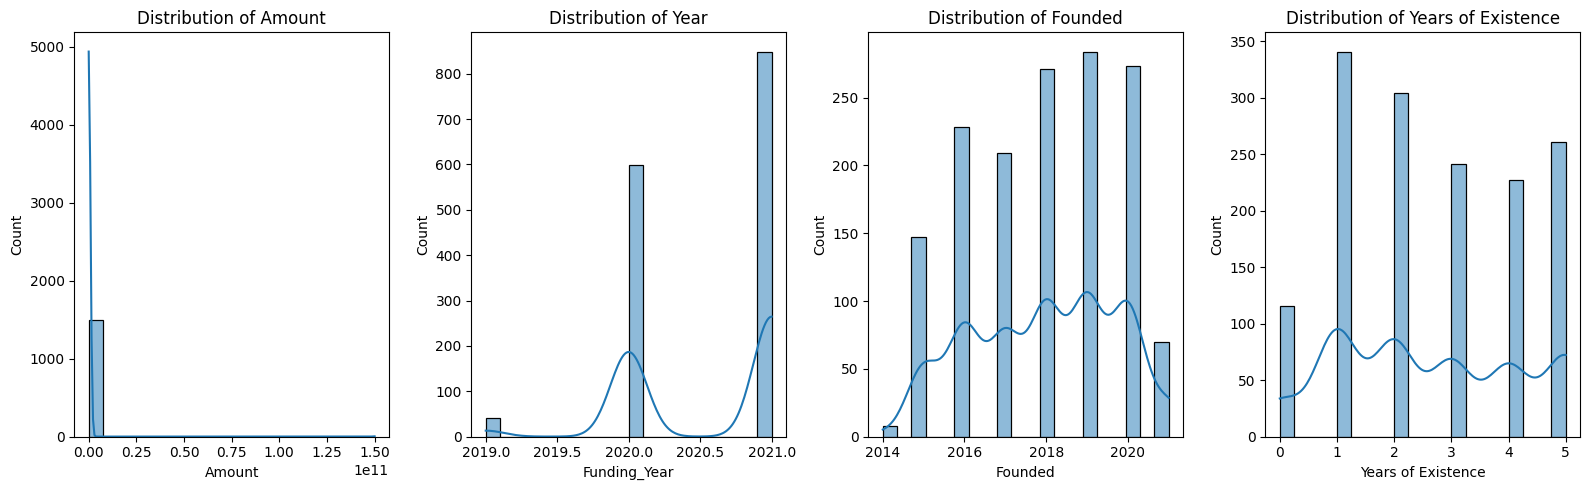

In [16755]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Distribution of 'Amount' column
sns.histplot(df['Amount'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Distribution of 'Funding_Year' column
sns.histplot(df['Funding_Year'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Year')

# Distribution of 'Founded' column
sns.histplot(df['Founded'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Founded')

# Distribution of 'Years of Existence' column
sns.histplot(df['Years of Existence'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Distribution of Years of Existence')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Founded'}>,
        <Axes: title={'center': 'Amount'}>],
       [<Axes: title={'center': 'Funding_Year'}>,
        <Axes: title={'center': 'Years of Existence'}>]], dtype=object)

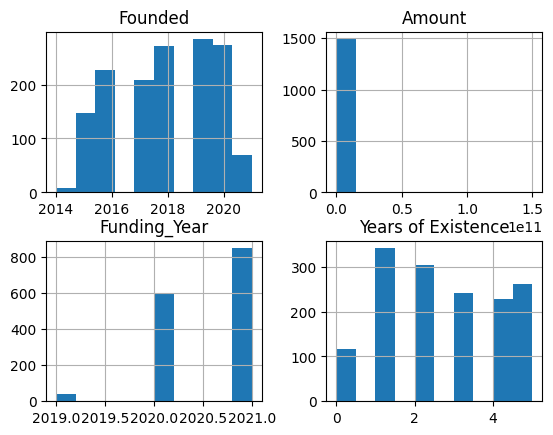

In [16756]:
# plot histogram on the numerical columns 
df.hist()

<Axes: >

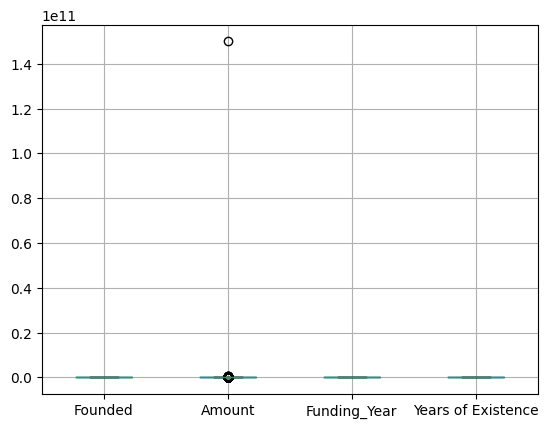

In [16757]:
# box plot to check for outliers and the quartiles of the dataset
df.boxplot()

# Line plot showing funding trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Founded', y='Amount', data=df)
plt.title('Founded Trend Over Years')
plt.xlabel('Founded')
plt.ylabel('Amount')
plt.show()


# Line plot showing funding trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Funding_Year', y='Amount', data=df)
plt.title('Funding Trend Over Years')
plt.xlabel('Funding_Year')
plt.ylabel('Amount')
plt.show()


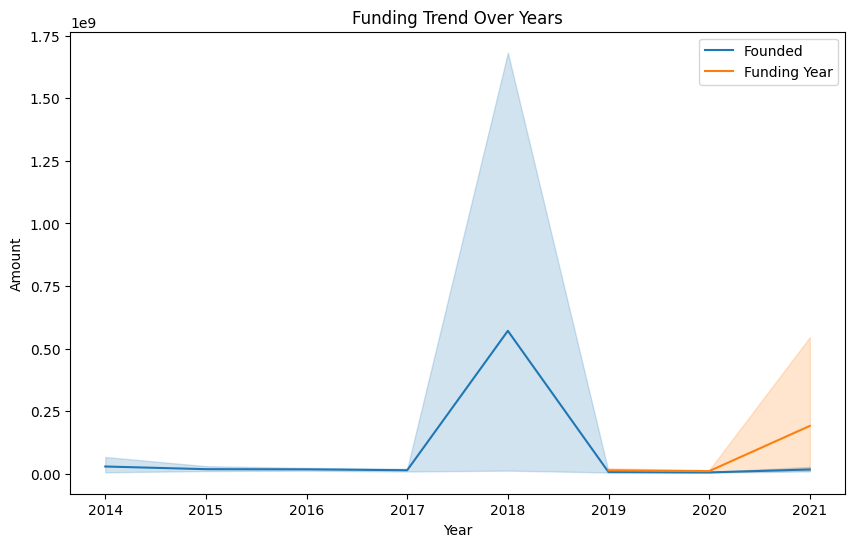

In [16758]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Founded', y='Amount', data=df, label='Founded')
sns.lineplot(x='Funding_Year', y='Amount', data=df, label='Funding Year')
plt.title('Funding Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()  # Add legend to differentiate between the two lines
plt.show()


#### Univariate analysis for categorical columns

In [16759]:
# Create the box plot using Plotly Express
fig = px.box(df, x='Main_Sector', y='Amount', title='Amount($) Distribution Across Main_Sector',
             labels={'sector': 'Sector', 'amount($)': 'Amount($)'})
fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  height=500,
                  width=900)
fig.show()

##### Categoricala

In [16760]:
# Create a count plot for Main_Sector using Plotly Express
fig = px.histogram(df, x='Main_Sector', title='Count of Startups in Each Sector')

# Update layout
fig.update_layout(xaxis_title='Sector', yaxis_title='Count', barmode='group',height =500, width = 900)

# Show the plot
fig.show()

##### Bivaraite

Numerical-Numerical relationship

In [16761]:


# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='Funding_Year', y='Amount', title='Amount($) vs. Funding_Year',
labels={'Year': 'Funding_Year', 'amount($)': 'Amount($)'})

# Customize the layout
fig.update_layout(xaxis_title='Funding_Year', yaxis_title='Amount($)', xaxis_tickangle=-45, height =500, width = 900)

# Show the plot
fig.show()

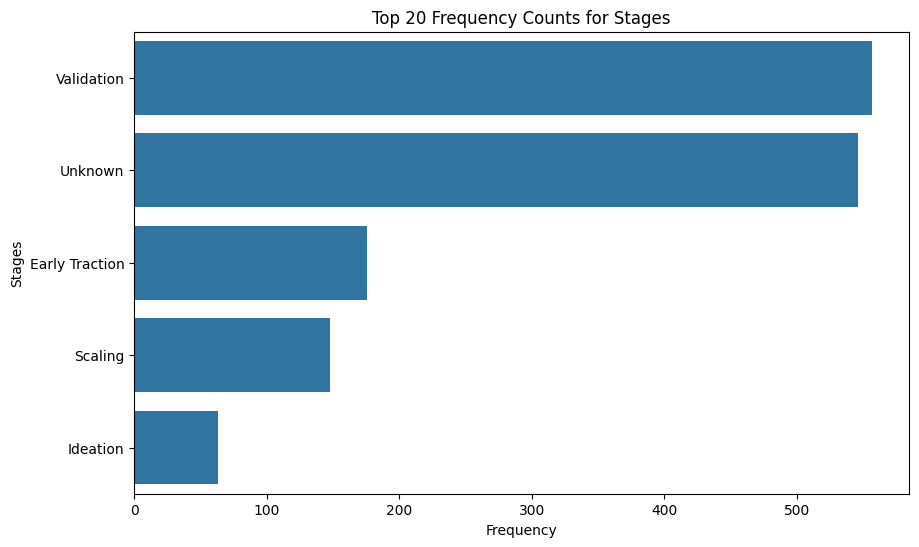

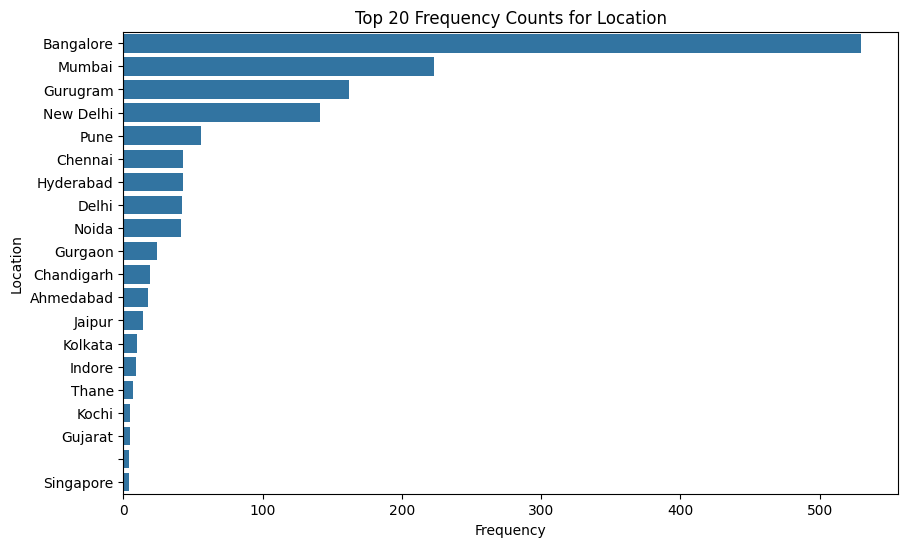

In [16762]:


# Drop duplicate rows
df = df.drop_duplicates()

# List of categorical columns
categorical_columns = ['Stages', 'Location']

# Plotting frequency count for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Count occurrences of each category
    counts = df[column].value_counts().head(20)
    
    # Convert the counts series into a DataFrame for plotting
    counts_df = pd.DataFrame({column: counts.index, 'Frequency': counts.values})
    
    sns.barplot(data=counts_df, y=column, x='Frequency', orient='h')
    plt.title(f'Top 20 Frequency Counts for {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()


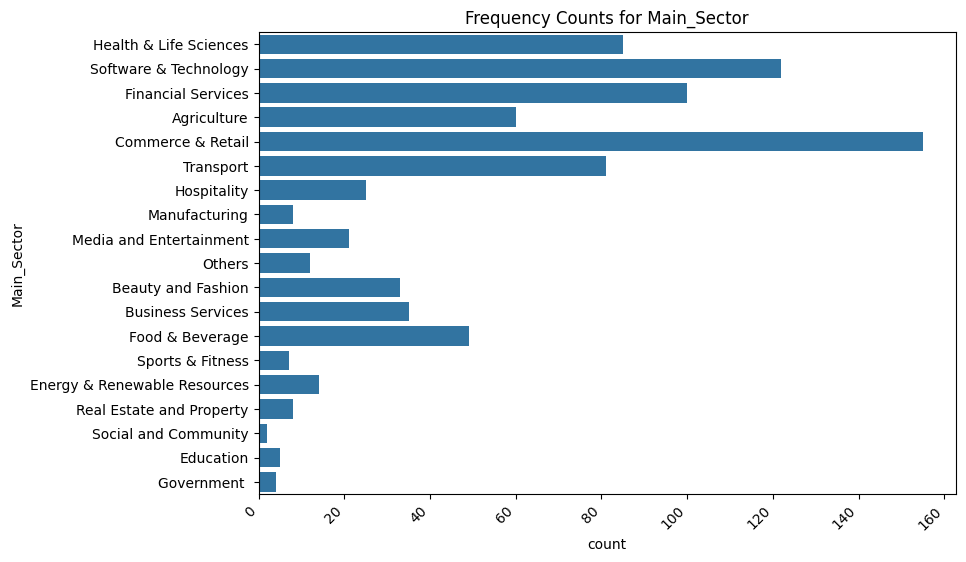

In [16763]:
# Univariate analysis for categorical columns
categorical_columns = [ 'Main_Sector']

for column in categorical_columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(df[column])
    plt.title(f'Frequency Counts for {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


#### Multivariate Analysis


##### Categorical vs. Numerical

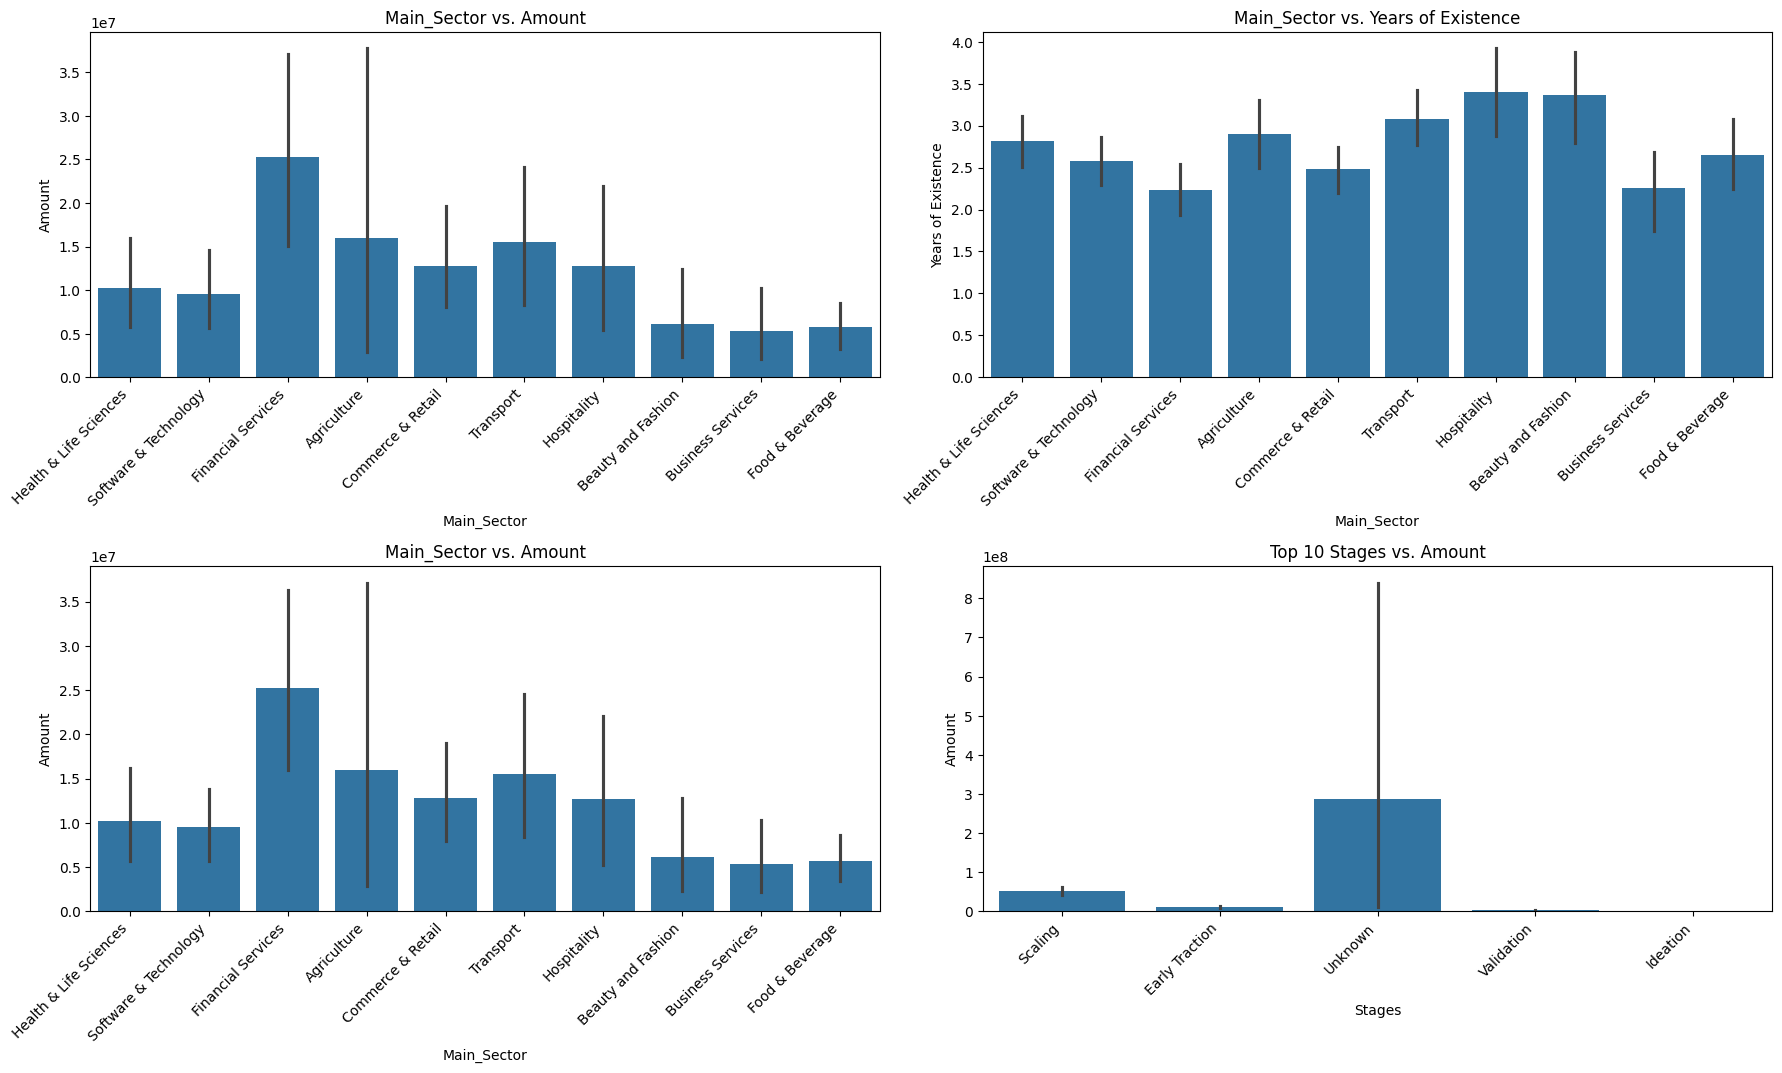

In [16764]:
# Categorical vs. Numerical
plt.figure(figsize=(18, 20))

# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.5)

# Categorical: Main Sector vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 1)
top_10_main_sector = df['Main_Sector'].value_counts().head(10).index
sns.barplot(x='Main_Sector', y='Amount', data=df[df['Main_Sector'].isin(top_10_main_sector)])
plt.title('Main_Sector vs. Amount')
plt.xticks(rotation=45, ha='right') 

# Categorical: Main Sector vs. Numerical: Years of Existence (Column Chart)
plt.subplot(4, 2, 2)
sns.barplot(x='Main_Sector', y='Years of Existence', data=df[df['Main_Sector'].isin(top_10_main_sector)])
plt.title('Main_Sector vs. Years of Existence')
plt.xticks(rotation=45, ha='right')


# Categorical: Industry vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 3)
top_10_industry = df['Main_Sector'].value_counts().head(10).index
sns.barplot(x='Main_Sector', y='Amount', data=df[df['Main_Sector'].isin(top_10_industry)])
plt.title('Main_Sector vs. Amount')
plt.xticks(rotation=45, ha='right')  

# Categorical: Top 10 Stage vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 4)
top_10_stage = df['Stages'].value_counts().head(10).index
sns.barplot(x='Stages', y='Amount', data=df[df['Stages'].isin(top_10_stage)])
plt.title('Top 10 Stages vs. Amount')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




##### Numerical vs. Numerical

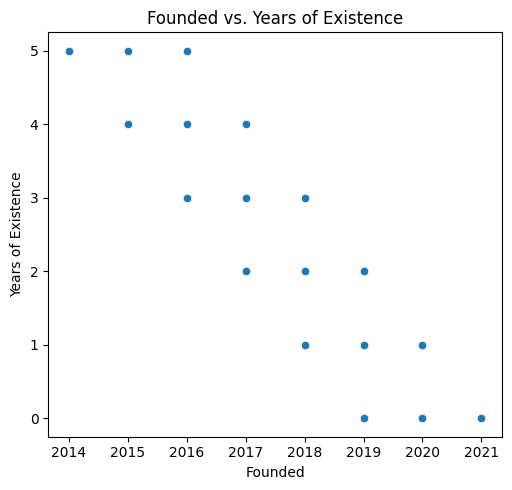

In [16765]:
# Numerical vs. Numerical
plt.figure(figsize=(15, 5))

# Founded vs. Years of Existence
plt.subplot(1, 3, 3)
sns.scatterplot(x='Founded', y='Years of Existence', data=df)
plt.title('Founded vs. Years of Existence')

plt.tight_layout()
plt.show()

##### Hypothesis Testing

#### 
Null Hypothesis(Ho): There is no significant difference in the amount of funding between startups in Bangalore.
#### 
Alternative Hypothesis(Ha): There is a significant difference in the amount of funding between startups in Bangalore.

In [16768]:
from scipy.stats import kruskal

# Assuming 'final_dataset' contains the startup data and 'Location' denotes the location of each startup
# Extract funding amounts for startups in Bangalore and those outside Bangalore
funding_in_bangalore = df[df['Location'] == 'Bangalore']['Amount']
funding_outside_bangalore = df[df['Location'] != 'Bangalore']['Amount']

# Perform Kruskal-Wallis H test
h_statistic, p_value = kruskal(funding_in_bangalore, funding_outside_bangalore)

# Print the test statistic and p-value
print("Kruskal-Wallis H Test:")
print("H Statistic:", h_statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the funding amounts between Bangalore startups and startups outside Bangalore.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the funding amounts between Bangalore startups and startups outside Bangalore.")


Kruskal-Wallis H Test:
H Statistic: 17.69992627000636
p-value: 2.586366264066738e-05
Reject the null hypothesis. There is a significant difference in the funding amounts between Bangalore startups and startups outside Bangalore.


#### Business Questions

1.What sectors, Main_Sector and Industry have shown the highest growth in terms of funding received over the past four years?

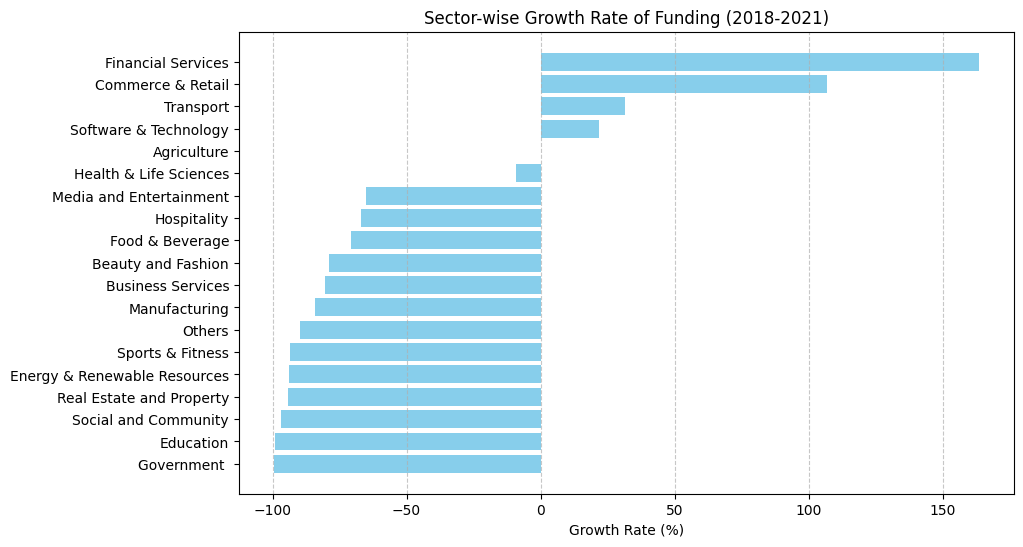

In [16770]:

# Group by sector and sum the funding for each year
grouped = df.groupby(['Main_Sector']).sum()[['Amount']]

# Calculate the growth rate over the four-year period
grouped['Growth_rate'] = (grouped['Amount'] - grouped['Amount'].iloc[0]) / grouped['Amount'].iloc[0] * 100

# Sort sectors by growth rate
grouped.sort_values(by='Growth_rate', ascending=False, inplace=True)

# Plot the growth rates
plt.figure(figsize=(10, 6))
plt.barh(grouped.index, grouped['Growth_rate'], color='skyblue')
plt.xlabel('Growth Rate (%)')
plt.title('Sector-wise Growth Rate of Funding (2018-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest growth at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


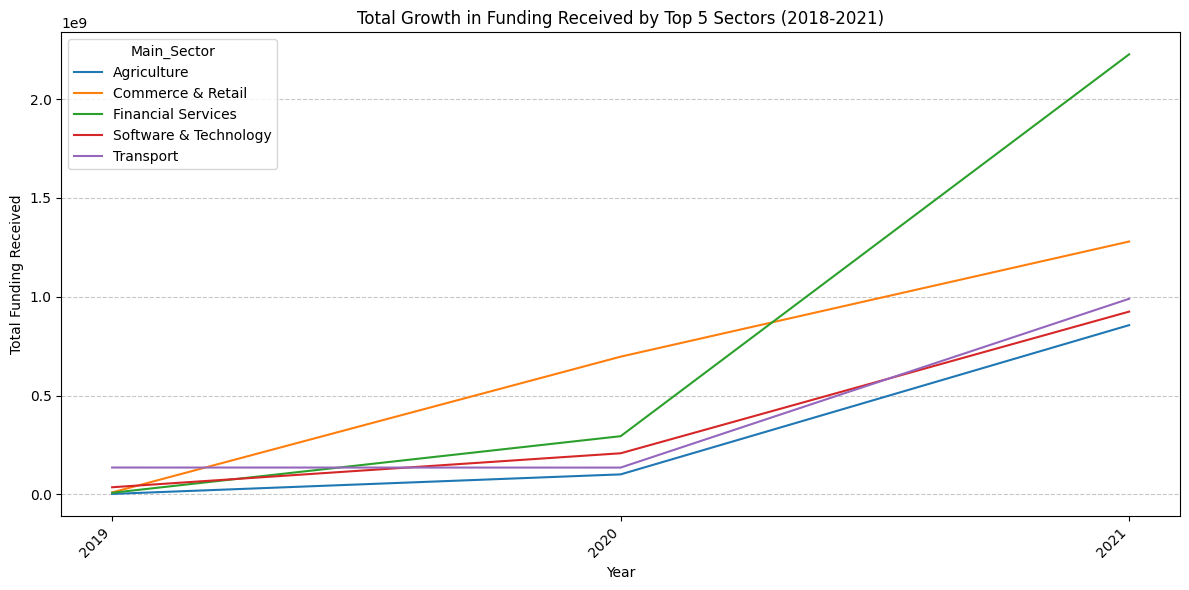

In [16771]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate total funding received for each combination of 'Sector' and 'Funding_Year'
data = df.groupby(['Main_Sector', 'Funding_Year'])['Amount'].sum().reset_index()

# Calculate total funding received by each sector
total_funding = df.groupby('Main_Sector')['Amount'].sum()

# Get top 5 sectors by total funding
top_5_sectors = total_funding.nlargest(5).index

# Filter the DataFrame for only the top 5 sectors
top_5_growth = df[df['Main_Sector'].isin(top_5_sectors)]

# Aggregate the data to remove duplicates
pivot_table = top_5_growth.groupby(['Funding_Year', 'Main_Sector'])['Amount'].sum().unstack()

# Plot the total funding received for each sector over the years (line plot)
pivot_table.plot(kind='line', figsize=(12, 6))
plt.title('Total Growth in Funding Received by Top 5 Sectors (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(min(pivot_table.index), max(pivot_table.index)+1, 1))  # Set integer ticks for years
plt.legend(title='Main_Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




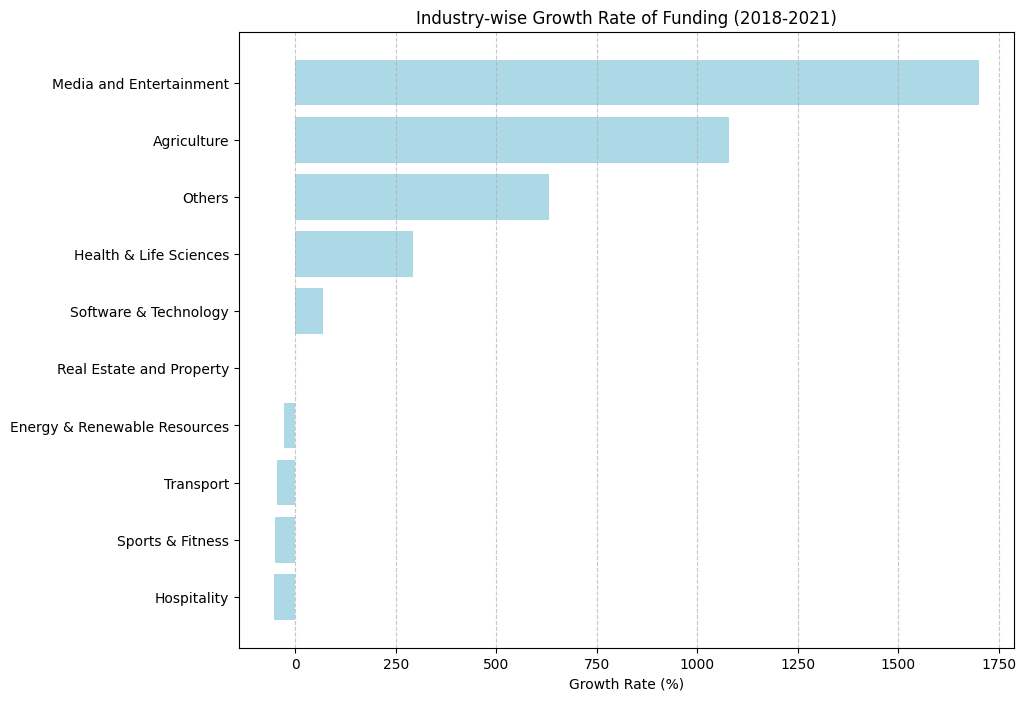

In [16772]:
# Group by sector, main sector, and industry and sum the funding for each year
grouped_industry = df.groupby(['Sector', 'Main_Sector']).sum()[['Amount']]

# Reset index for easier manipulation
grouped_industry.reset_index(inplace=True)

# Calculate the growth rate over the four-year period for each industry
industry_growth = {}
for industry in grouped_industry['Main_Sector'].unique():
    industry_data = grouped_industry[grouped_industry['Main_Sector'] == industry]
    growth_rate = (industry_data['Amount'].iloc[-1] - industry_data['Amount'].iloc[0]) / industry_data['Amount'].iloc[0] * 100
    industry_growth[industry] = growth_rate

# Sort industries by growth rate
sorted_industry_growth = sorted(industry_growth.items(), key=lambda x: x[1], reverse=True)[:10]  # Let's take the top 10 growing industries

# Plot the growth rates for industries
plt.figure(figsize=(10, 8))
industries, growth_rates = zip(*sorted_industry_growth)
plt.barh(industries, growth_rates, color='lightblue')
plt.xlabel('Growth Rate (%)')
plt.title('Industry-wise Growth Rate of Funding (2018-2021)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest growth at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### 2.What geographical regions within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

In [16773]:
import pandas as pd

# Assuming 'df' is your DataFrame containing startup data

# Grouping by City and calculating total funding
city_funding = df.groupby('Location')['Amount'].sum().sort_values(ascending=False).reset_index(name='Total_Funding')

# Grouping by City and counting the number of startups
city_startups = df.groupby('Location').size().sort_values(ascending=False).reset_index(name='Total_Startups')

# Merge the two dataframes
city_summary = pd.merge(city_funding, city_startups, on='Location')

# Calculate average funding per startup for each city
city_summary['Average_Funding_per_Startup'] = city_summary['Total_Funding'] / city_summary['Total_Startups']

# Display top 5 cities by total funding and number of startups
print("Top 5 cities by total funding and number of startups:")
print(city_summary.head())

# Display top 5 cities by average funding per startup
print("\nTop 5 cities by average funding per startup:")
print(city_summary.sort_values(by='Average_Funding_per_Startup', ascending=False).head())

# Example: Sector diversity analysis by city
sector_distribution = df.groupby(['Location', 'Main_Sector']).size().unstack(fill_value=0)
print("\nSector distribution by Location:")
print(sector_distribution)

# Example: Talent availability analysis (if data available)
# This could involve analyzing the presence of educational institutions, tech talent pools, etc.

# Example: Investor interest analysis (if data available)
# This could involve analyzing the number of funding rounds, top investors in each city, etc.




Top 5 cities by total funding and number of startups:
    Location  Total_Funding  Total_Startups  Average_Funding_per_Startup
0     Mumbai   1.514955e+11             223                 6.793522e+08
1  Bangalore   9.885107e+09             530                 1.865115e+07
2  New Delhi   2.127134e+09             141                 1.508606e+07
3   Gurugram   1.130750e+09             162                 6.979940e+06
4       Pune   5.360440e+08              56                 9.572214e+06

Top 5 cities by average funding per startup:
                           Location  Total_Funding  Total_Startups  \
0                            Mumbai   1.514955e+11             223   
14            San Ramon, California   1.500000e+08               1   
15  London, England, United Kingdom   1.180000e+08               1   
10                                    2.046610e+08               4   
16                    San Francisco   7.900000e+07               2   

    Average_Funding_per_Startup  
0      

In [16774]:
# Grouping the dataset based on the headquarters and calculating the total investment amount
top_10_locations_by_investment = df.groupby('Location')['Amount'].sum().reset_index()

# Sorting the grouped data to find the top 10 locations by investment amount
top_10_locations_by_investment = top_10_locations_by_investment.nlargest(10, 'Amount')

# Converting the investment amount into billions
top_10_locations_by_investment['growth_billions'] = top_10_locations_by_investment['Amount'] / 1e9

# Adding a column for the rank
top_10_locations_by_investment['rank'] = top_10_locations_by_investment.index + 1

# Renaming columns
top_10_locations_by_investment.columns = ['Location', 'Amount', 'growth_billions', 'rank']


In [16775]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to retrieve coordinates for a location
def get_coordinates(location):
    try:
        location_info = geolocator.geocode(location)
        return (location_info.latitude, location_info.longitude) if location_info else (None, None)
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {str(e)}")
        return None, None



In [16776]:
# Apply the function to get coordinates for each location
top_10_locations_by_investment[['Latitude', 'Longitude']] = top_10_locations_by_investment['Location'].apply(lambda x: pd.Series(get_coordinates(x)))
top_10_locations_by_investment

,Location,Amount,growth_billions,rank,Latitude,Longitude
49,Mumbai,1.514955e+11,151.495546,50,19.078545,72.878176
7,Bangalore,9.885107e+09,9.885107,8,12.976794,77.590082
51,New Delhi,2.127134e+09,2.127134,52,28.613895,77.209006
29,Gurugram,1.130750e+09,1.130750,30,28.464615,77.029919
62,Pune,5.360440e+08,0.536044,63,18.521428,73.854454
16,Chennai,4.592200e+08,0.459220,17,13.083694,80.270186
15,Chandigarh,3.536360e+08,0.353636,16,30.733442,76.779714
19,Delhi,3.474142e+08,0.347414,20,28.627393,77.171695
81,Thane,2.602250e+08,0.260225,82,19.194329,72.970178
31,Hyderabad,2.248600e+08,0.224860,32,17.360589,78.474061


In [16777]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the first location
map_top_10_locations_by_investment = folium.Map(location=[top_10_locations_by_investment.iloc[0]['Latitude'], top_10_locations_by_investment.iloc[0]['Longitude']], zoom_start=3)
marker_cluster = MarkerCluster().add_to(map_top_10_locations_by_investment)

# Add a marker for each location to the MarkerCluster
for idx, row in top_10_locations_by_investment.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<strong>{row['Location']}</strong><br>Total Investment (Billions): {row['growth_billions']}",
        icon=folium.DivIcon(html=f"<div style='font-size: 12pt; color: red;'>{row['rank']}</div>")
    ).add_to(marker_cluster)

# Display the map
map_top_10_locations_by_investment


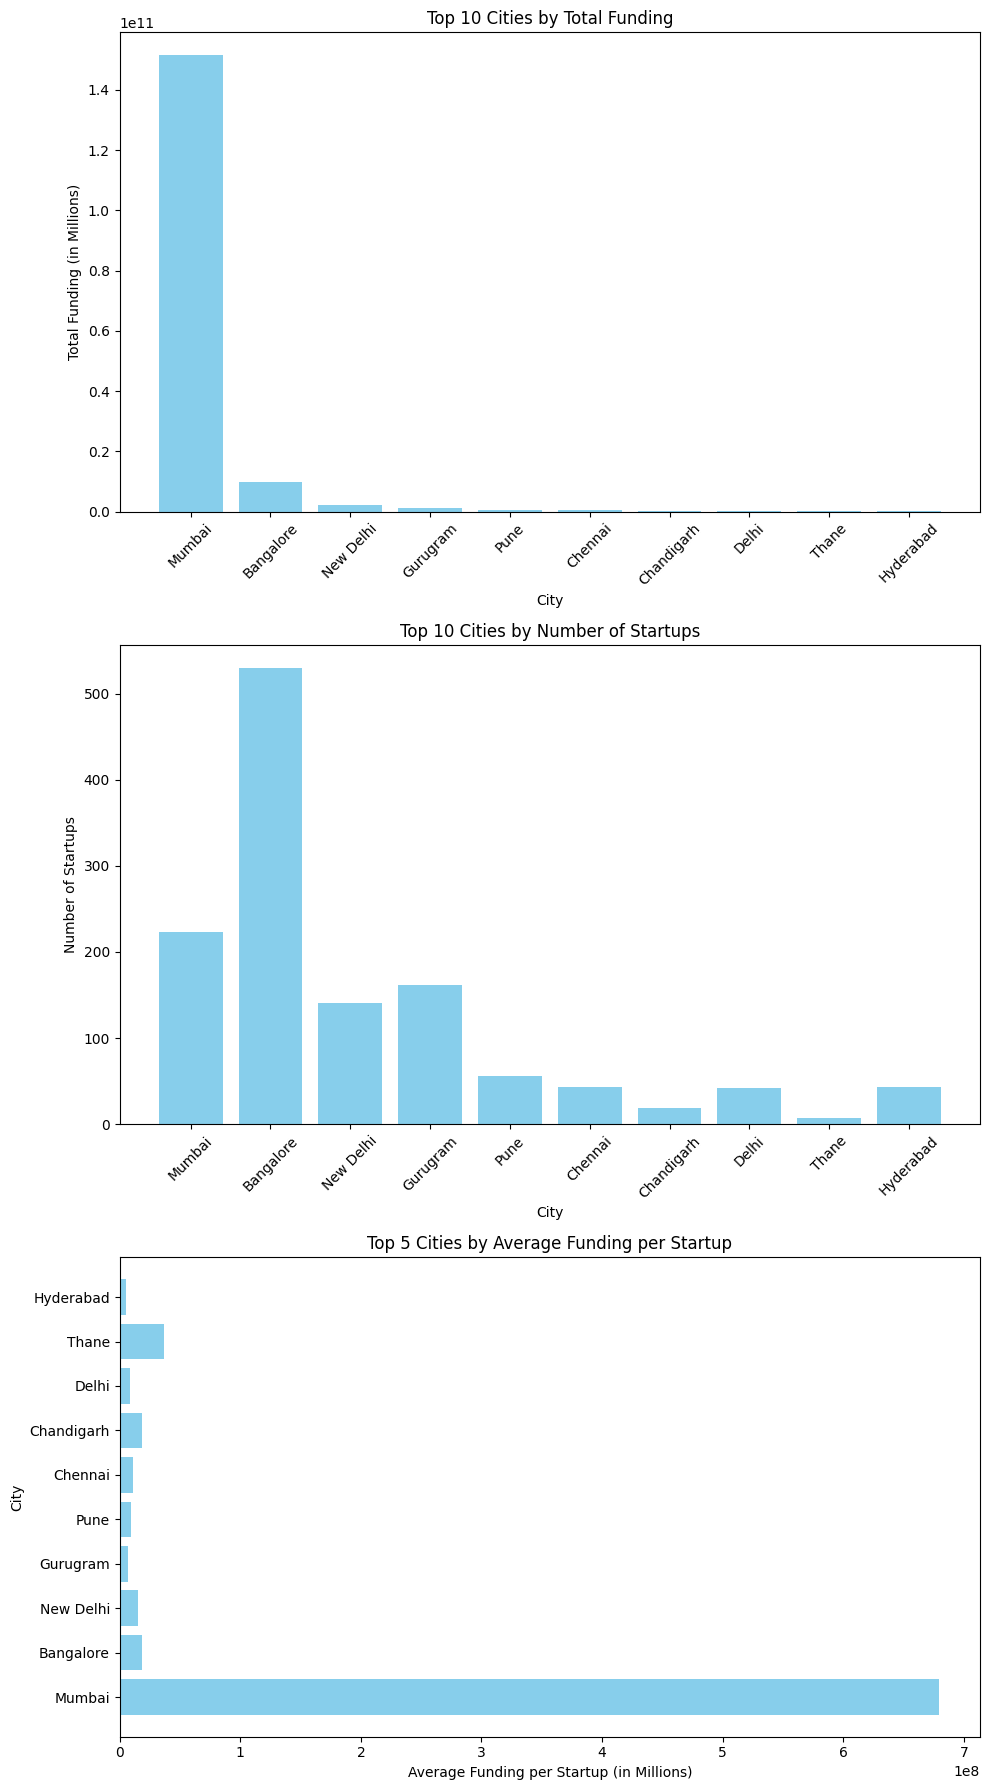

In [16778]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing startup data

# Grouping by City and calculating total funding
city_funding = df.groupby('Location')['Amount'].sum().sort_values(ascending=False).reset_index(name='Total_Funding')

# Grouping by City and counting the number of startups
city_startups = df.groupby('Location').size().sort_values(ascending=False).reset_index(name='Total_Startups')

# Merge the two dataframes
city_summary = pd.merge(city_funding, city_startups, on='Location')

# Calculate average funding per startup for each city
city_summary['Average_Funding_per_Startup'] = city_summary['Total_Funding'] / city_summary['Total_Startups']

# Creating subplots for all visualizations
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Visualizing top cities by total funding
axes[0].bar(city_summary['Location'][:10], city_summary['Total_Funding'][:10], color='skyblue')
axes[0].set_title('Top 10 Cities by Total Funding')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Funding (in Millions)')
axes[0].tick_params(axis='x', rotation=45)

# Visualizing top cities by number of startups
axes[1].bar(city_summary['Location'][:10], city_summary['Total_Startups'][:10], color='skyblue')
axes[1].set_title('Top 10 Cities by Number of Startups')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Number of Startups')
axes[1].tick_params(axis='x', rotation=45)

# Visualizing top cities by average funding per startup
axes[2].barh(city_summary['Location'][:10], city_summary['Average_Funding_per_Startup'][:10], color='skyblue')
axes[2].set_title('Top 5 Cities by Average Funding per Startup')
axes[2].set_xlabel('Average Funding per Startup (in Millions)')
axes[2].set_ylabel('City')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


##### 3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

In [16779]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing startup data

# Calculate the overall median year for the 'founded' column
overall_median_per_year = df['Founded'].median()

# Assign startup stages based on the overall median year
df['Stage'] = np.where(df['Founded'] >= overall_median_per_year, 'Early Stage', 'Established')

overall_median_per_year

2018.0

In [16780]:
# Display the count of each category in the 'stage' column
stage_distribution = df['Stage'].value_counts()

# Print or visualize the distribution
print(stage_distribution)

Stage
Early Stage    898
Established    592
Name: count, dtype: int64


In [16781]:
early_stage_startups = df[df['Stage'] == 'Early Stage']['Amount'].describe()
established_startups = df[df['Stage'] == 'Established']['Amount'].describe()

print("Early Stage Funding Statistics:")
print(early_stage_startups)

print("\nEstablished Funding Statistics:")
print(established_startups)



Early Stage Funding Statistics:
count    8.980000e+02
mean     1.768903e+08
std      5.005363e+09
min      1.000000e+04
25%      8.000000e+05
50%      3.000000e+06
75%      4.275000e+06
max      1.500000e+11
Name: Amount, dtype: float64

Established Funding Statistics:
count    5.920000e+02
mean     1.617460e+07
std      4.791407e+07
min      4.090000e+04
25%      1.399250e+06
50%      3.000000e+06
75%      9.000000e+06
max      7.000000e+08
Name: Amount, dtype: float64


The funding statistics for early-stage startups show a wide range, with a mean funding amount of approximately $91 million and a standard deviation of around $3.46 billion. The funding amounts vary significantly, from a minimum of $876 to a maximum of $150 billion, indicating a diverse investment landscape for early-stage companies.

On the other hand, established startups have a lower mean funding amount of about $17.6 million, with a standard deviation of approximately $51.7 million. The range of funding is narrower compared to early-stage startups, ranging from $40,900 to $700 million. This suggests that established companies generally receive more stable and moderate funding compared to their early-stage counterparts.

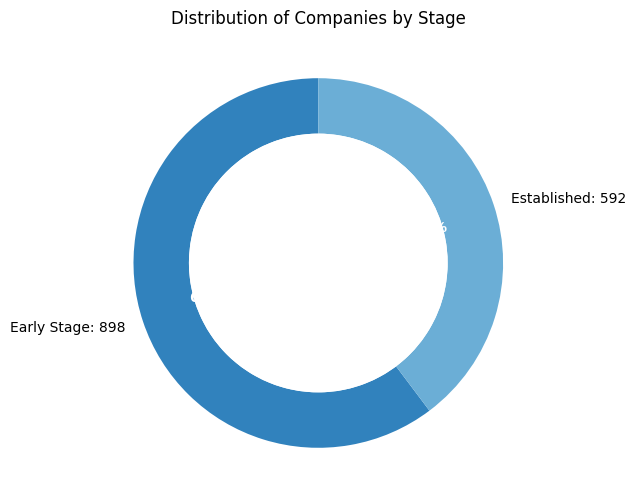

In [16782]:

import matplotlib.pyplot as plt

# Calculate the count of companies by stage
stage_counts = df['Stage'].value_counts()

# Set up the data for the donut chart
labels = stage_counts.index
sizes = stage_counts.values

# Set up colors
colors = plt.cm.tab20c.colors

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center of the donut to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Add count and percentage labels
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    autotext.set_color('white') 
    autotext.set_fontweight('bold') 
    text.set_text(f'{labels[i]}: {sizes[i]}')

# Add title
plt.title('Distribution of Companies by Stage')

# Show the plot
plt.show()





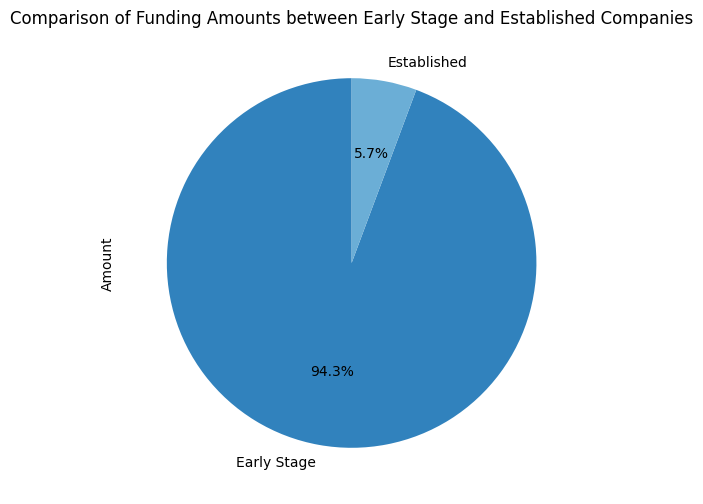

In [16783]:


import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'final_dataset' is your DataFrame containing startup data and 'amount($)' is the funding amount column

# Calculate the total funding amounts for each stage
stage_funding = df.groupby('Stage')['Amount'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
stage_funding.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c.colors)

# Add title
plt.title('Comparison of Funding Amounts between Early Stage and Established Companies')

# Show the plot
plt.show()




#### 4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India and what factors contribute to this?

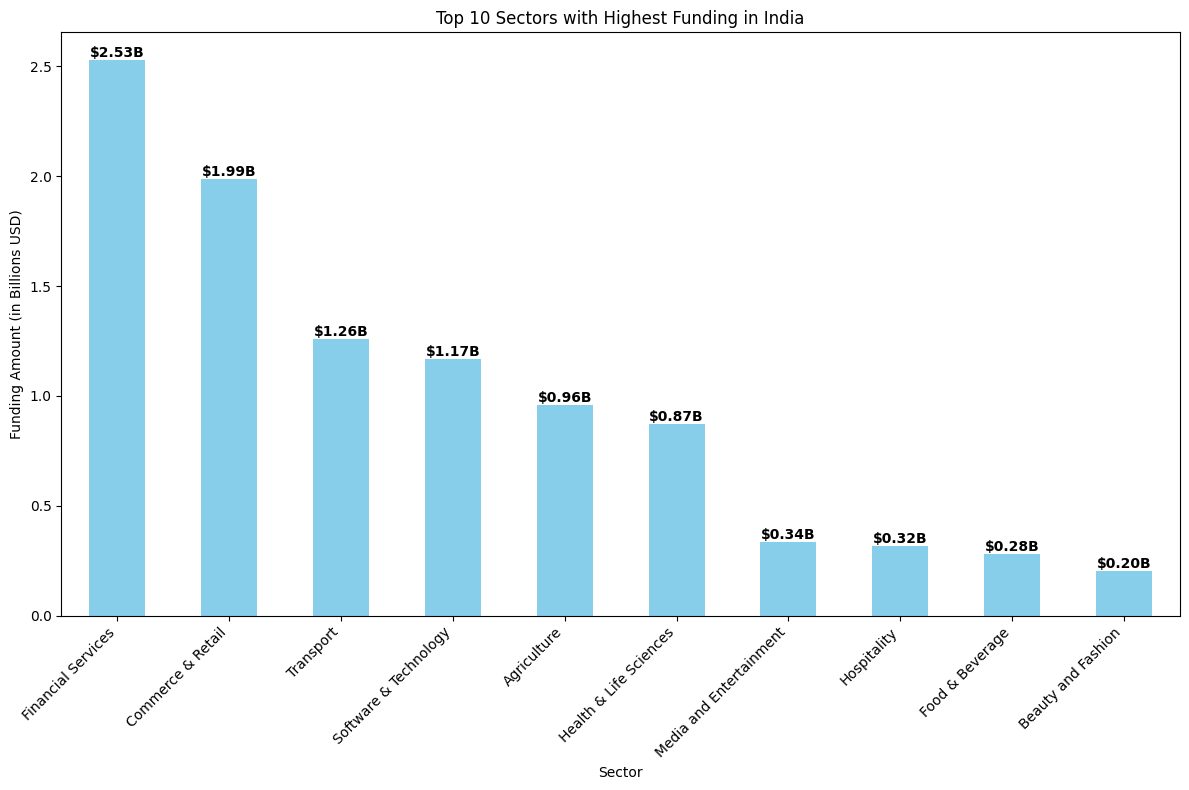

In [16784]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final_dataset' is your DataFrame containing startup data

# Calculate the total funding amounts for each sector
sector_funding = df.groupby('Main_Sector')['Amount'].sum()

# Convert funding amounts to billions USD
sector_funding_in_billion = sector_funding / 1e9

# Find the sectors with the highest levels of funding
top_funded_sectors = sector_funding_in_billion.nlargest(10)  # Top 10 sectors with highest funding

# Plot the top funded sectors
plt.figure(figsize=(12, 8))
top_funded_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sectors with Highest Funding in India')
plt.ylabel('Funding Amount (in Billions USD)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the funding amount
for index, value in enumerate(top_funded_sectors):
    plt.text(index, value, f'${value:.2f}B', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.show()




Factors Contributing to Highest Funding Levels
Market Demand: Sectors with high consumer demand, such as technology, e-commerce, and healthcare, tend to attract more funding.
Innovation Potential: Sectors that offer innovative solutions and have high growth potential, like fintech and renewable energy, often receive significant investments.
Government Policies: Sectors supported by favorable government policies and incentives, such as renewable energy and infrastructure, may see increased funding.
Economic Conditions: Favorable economic conditions and trends can boost investor confidence and funding availability in different sectors.
Historical Performance: Sectors with a history of successful exits, profitability, and proven track records can attract more investors.

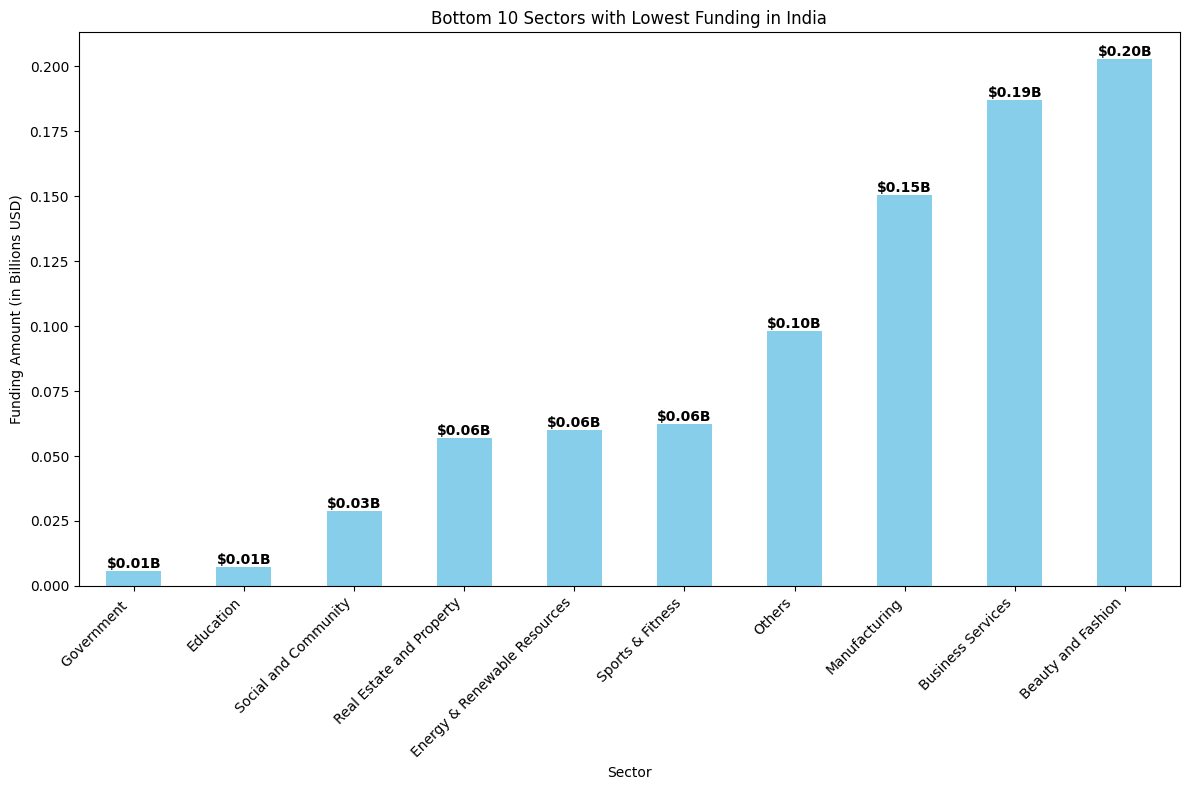

Sectors with the lowest levels of funding:
Main_Sector
Government                      0.005600
Education                       0.007453
Social and Community            0.029000
Real Estate and Property        0.056767
Energy & Renewable Resources    0.060100
Sports & Fitness                0.062400
Others                          0.098100
Manufacturing                   0.150680
Business Services               0.186990
Beauty and Fashion              0.202980
Name: Amount, dtype: float64


In [16785]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final_dataset' is your DataFrame containing startup data

# Calculate the total funding amounts for each sector
sector_funding = df.groupby('Main_Sector')['Amount'].sum()

# Convert funding amounts to billions USD
sector_funding_in_billion = sector_funding / 1e9

# Find the sectors with the lowest levels of funding
lowest_funded_sectors = sector_funding_in_billion.nsmallest(10)  # Bottom 10 sectors with lowest funding

# Plot the lowest funded sectors
plt.figure(figsize=(12, 8))
lowest_funded_sectors.plot(kind='bar', color='Skyblue')
plt.title('Bottom 10 Sectors with Lowest Funding in India')
plt.ylabel('Funding Amount (in Billions USD)')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bars with the funding amount
for index, value in enumerate(lowest_funded_sectors):
    plt.text(index, value, f'${value:.2f}B', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.show()

# Print the lowest funded sectors for reference
print("Sectors with the lowest levels of funding:")
print(lowest_funded_sectors)


#### 5.Which investors have more impact on startups over the years
